<table border="0" style="width:100%">
 <tr>
    <td>
        <img src="https://static-frm.ie.edu/university/wp-content/uploads/sites/6/2022/06/IE-University-logo.png" width=150>
     </td>
    <td><div style="font-family:'Courier New'">
            <div style="font-size:25px">
                <div style="text-align: right"> 
                    <b> Machine Learning II-Group Project</b>
                    <br>
                    Group G: Jeremy Halfon, Juan Pablo López, Yara Hoteit, Maria Fernanda Espinal, Alexandra Pearson, Arshad Faisan, Arjun Dalal 
                    <br><br>
                </div>
            </div>
        </div>
    </td>
 </tr>
</table>

# EDA

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import IsolationForest
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, matthews_corrcoef, cohen_kappa_score, precision_recall_curve, roc_curve
import hvplot.pandas  


In [218]:
data = pd.read_csv("train.csv")
data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [220]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1677.0,838.000000,484.252517,0.0,419.0,838.0,1257.0,1676.0
Age,1677.0,36.036971,8.507112,18.0,30.0,35.0,41.0,60.0
DailyRate,1677.0,892.749553,374.496259,107.0,589.0,890.0,1223.0,3921.0
DistanceFromHome,1677.0,8.683959,7.826143,1.0,2.0,7.0,12.0,29.0
Education,1677.0,2.937984,1.039078,1.0,2.0,3.0,4.0,15.0
EmployeeCount,1677.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EnvironmentSatisfaction,1677.0,2.757901,1.086835,1.0,2.0,3.0,4.0,4.0
HourlyRate,1677.0,67.798450,19.435928,30.0,51.0,69.0,84.0,100.0
JobInvolvement,1677.0,2.782349,0.650664,1.0,2.0,3.0,3.0,4.0
JobLevel,1677.0,1.998807,1.083065,1.0,1.0,2.0,2.0,7.0


### First insights

Before diving into the data analysis, it's important to get a sense of the data and highlight any features that may be interesting or require further investigation.

- **DailyRate / Monthly Rate:** The maximum value for these columns seems really high. Are there any encoding mistakes?
- **Standard Hours, Employee count:** These columns seem unnecessary because their standard deviation is 0.
- **Number of companies worked:** Is it possible for an employee to have worked at 0 companies?

There may be potential correlations between the last set of columns (**YearsInCurrentRole, YearsWithCurrManager**, etc.), but this will be determined later with a correlation matrix.

Further distribution and outlier analysis will help us gain a deeper understanding of the data and decide on cleaning techniques.


In [221]:
# We drop the columns with one value
data.drop(columns = ["EmployeeCount", "StandardHours"], inplace = True)

# UNIVARIATE ANALYSIS

### NULL VALUES 

In [222]:
data.isnull().mean()

id                          0.0
Age                         0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtCompany              0.0
YearsInCurrentRole          0.0
YearsSinceLastPromotion     0.0
YearsWit

## Features distributions


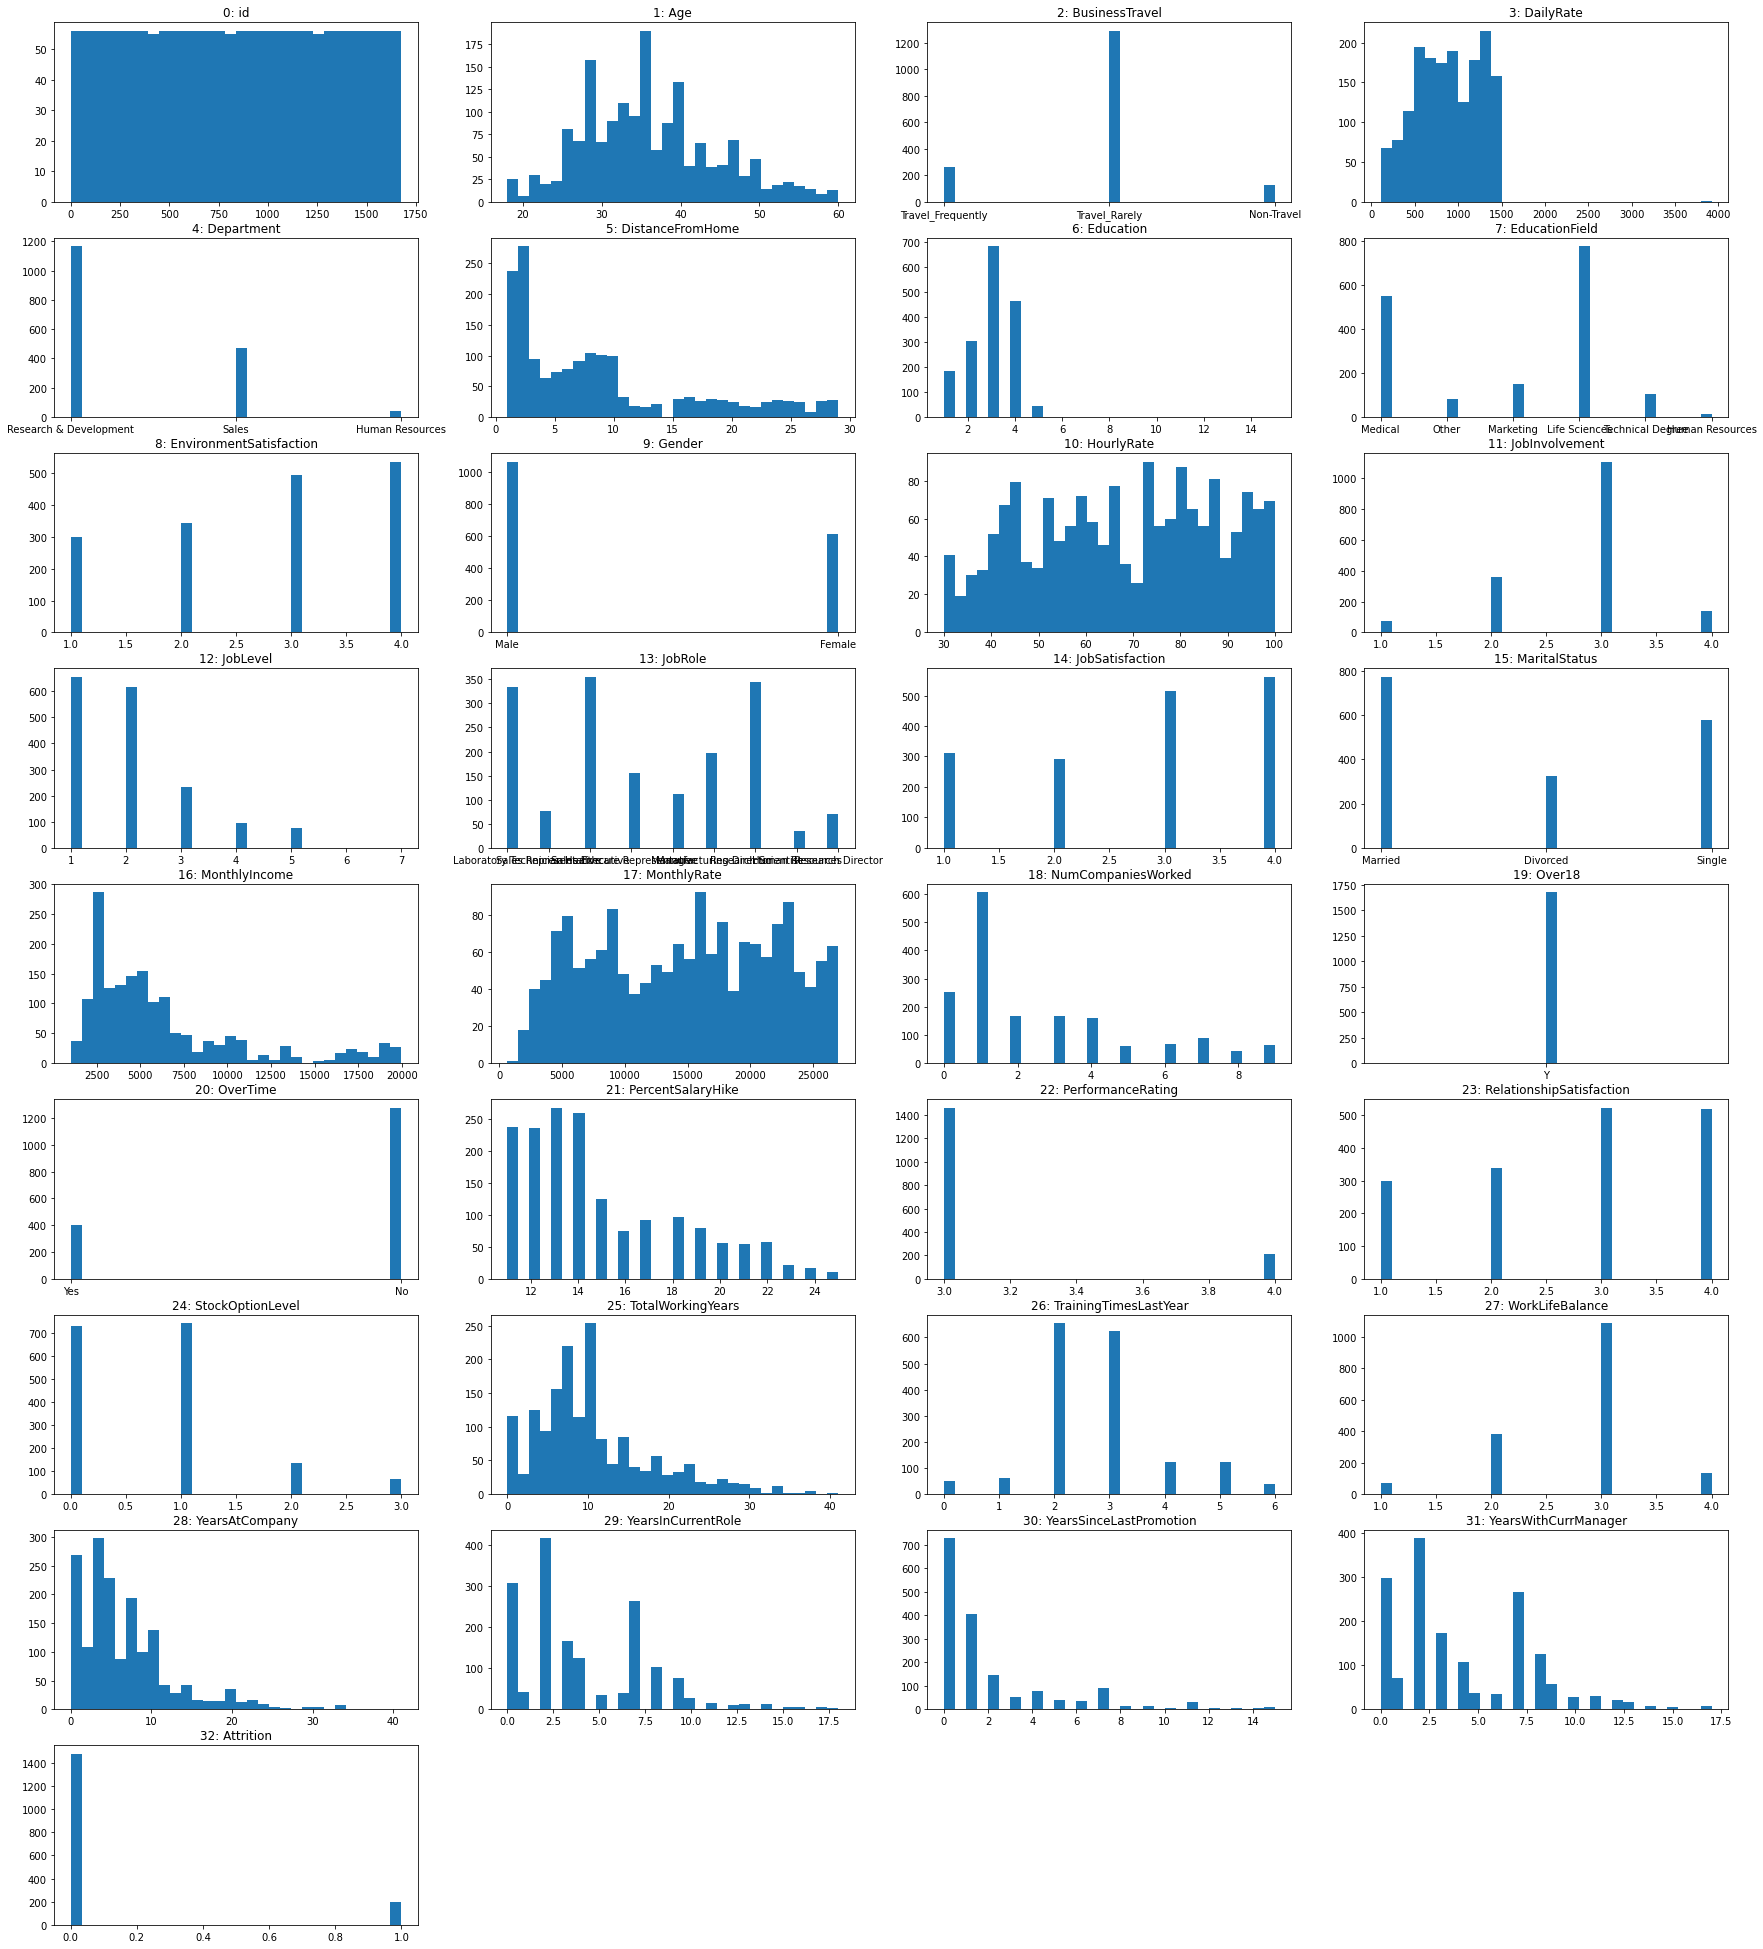

In [223]:
fig, axes = plt.subplots(9, 4, figsize=(30, 35))
for i, ax in enumerate(axes.ravel()):
    if i > 32:
        ax.set_visible(False)
        continue
    ax.hist(np.array(data[data.columns[i]]), bins=30)
    ax.set_title("{}: {}".format(i, data.columns[i]))

#### Skewness Analysis and Transformation

In [224]:
for column in data.select_dtypes("int64"):
    if data[column].skew() > 1:
        print(f"{column}: {data[column].skew()}")

DistanceFromHome: 1.071587662029399
JobLevel: 1.1703388036411688
MonthlyIncome: 1.55140987423284
NumCompaniesWorked: 1.1122097763107368
PerformanceRating: 2.234200351045196
StockOptionLevel: 1.0313772054833847
TotalWorkingYears: 1.1452337558022017
YearsAtCompany: 1.7382884681253736
YearsSinceLastPromotion: 2.0807536906322848
Attrition: 2.3516591696349285


In [225]:
list_skew = ["DistanceFromHome", "MonthlyIncome", "NumCompaniesWorked", "TotalWorkingYears", "YearsAtCompany", "YearsSinceLastPromotion"]

In [226]:
for column in (list_skew):
    if data[column].skew() > 0.1:
        data[column] = data[column].transform(lambda x:np.log1p(x))

In [227]:
for column in data.select_dtypes("int64"):
    if data[column].skew() > 0:
        print(f"{column}: {data[column].skew()}")

Age: 0.45409276352012634
DailyRate: 0.1616107789885762
Education: 0.5969367175254974
JobLevel: 1.1703388036411688
PercentSalaryHike: 0.9145096399716109
PerformanceRating: 2.234200351045196
StockOptionLevel: 1.0313772054833847
TrainingTimesLastYear: 0.5709590716454752
YearsInCurrentRole: 0.942663119085003
YearsWithCurrManager: 0.8177646043895521
Attrition: 2.3516591696349285


##### We checked for skewness in the distribution of the numerical features and selected a threshold of 1 for transforming the skewness of the selected columns. 

## Insights

- **Binning Categorical Variables:** When dealing with strongly unbalanced data, it may be beneficial to group some categories of categorical variables together.

- **Skewed Distributions:** Some distributions may be skewed, which can impact the performance of certain models (e.g. Logistic Regression requires normal distributions). We'll address these features below.

- **Monthly Income:** The data for monthly income is skewed. By applying a logarithmic transformation, we can obtain data that is more normally distributed.

- **Rescaled Data:** After rescaling the data, we'll analyze the distribution once again.

- **Unbalanced Target Variable:** It's easy to identify unbalanced data in the target variable. For instance, only x% of employees leave the company.

- **Dropping the "Over18" Column:** Since the "Over18" column has only one unique value, we can drop it.


In [228]:
# Drop the column with only 1 value
data.drop(columns = "Over18", inplace = True)

## CATEGORICAL VALUES

In [229]:
# Categorical features info about value counts
data_cat = data.select_dtypes("object").columns.tolist()
for column in data_cat:
    print(f"{column}:\n{data[column].value_counts()}\n")

BusinessTravel:
Travel_Rarely        1290
Travel_Frequently     261
Non-Travel            126
Name: BusinessTravel, dtype: int64

Department:
Research & Development    1167
Sales                      471
Human Resources             39
Name: Department, dtype: int64

EducationField:
Life Sciences       775
Medical             549
Marketing           152
Technical Degree    106
Other                82
Human Resources      13
Name: EducationField, dtype: int64

Gender:
Male      1064
Female     613
Name: Gender, dtype: int64

JobRole:
Sales Executive              355
Research Scientist           344
Laboratory Technician        334
Manufacturing Director       196
Healthcare Representative    155
Manager                      111
Sales Representative          77
Research Director             71
Human Resources               34
Name: JobRole, dtype: int64

MaritalStatus:
Married     773
Single      577
Divorced    327
Name: MaritalStatus, dtype: int64

OverTime:
No     1277
Yes     400
Name

In [230]:
# Numerical features info about values
data_num = data.select_dtypes("int").columns.tolist()
for column in data_num:
    if data[column].nunique() < 20:
        print(f"{column}:\n{data[column].value_counts()}\n")

Education:
3     682
4     464
2     304
1     182
5      44
15      1
Name: Education, dtype: int64

EnvironmentSatisfaction:
4    537
3    496
2    345
1    299
Name: EnvironmentSatisfaction, dtype: int64

JobInvolvement:
3    1107
2     358
4     139
1      73
Name: JobInvolvement, dtype: int64

JobLevel:
1    655
2    617
3    235
4     94
5     75
7      1
Name: JobLevel, dtype: int64

JobSatisfaction:
4    561
3    516
1    310
2    290
Name: JobSatisfaction, dtype: int64

PercentSalaryHike:
13    267
14    258
11    237
12    235
15    124
18     97
17     92
19     79
16     74
22     57
20     55
21     54
23     22
24     16
25     10
Name: PercentSalaryHike, dtype: int64

PerformanceRating:
3    1463
4     214
Name: PerformanceRating, dtype: int64

RelationshipSatisfaction:
3    523
4    518
2    337
1    299
Name: RelationshipSatisfaction, dtype: int64

StockOptionLevel:
1    745
0    732
2    135
3     65
Name: StockOptionLevel, dtype: int64

TrainingTimesLastYear:
2    65

## OUTLIERS

### Outlier Detection Process

1. **Individual Analysis of Features:** We'll start by analyzing each feature that has outliers. By doing so, we can combine this information with the feature's distribution to identify any mistakes in the data. Our goal is to remove these mistakes.

2. **Isolation Forest Method:** Next, we'll use the isolation forest method to detect whether a row is an outlier or not. We'll add a new column with 1 and 0 to indicate whether the row is an outlier or not. We'll try to use this column in our models and evaluate if it improves performance.


In [231]:
#clf = IsolationForest()
#var = clf.fit_predict(num_data)

In [232]:
#select all rows that are outliers

#out = var == -1
#num_data.loc[out , :]

In [233]:
# Create a function to detect outliers based on z score and a treshold of 3

def detect_outlier(var):
    threshold=3
    mean = np.mean(var)
    std =np.std(var)
    z_score= (var - mean)/std
    outliers = var.loc[np.abs(z_score) > threshold]  
    return outliers

In [234]:
# Create a function to detect outliers based on iqr

def detect_outlier2(var):
    q75 = var.quantile(.75)
    q25 = var.quantile(.25)
    iqr = q75 - q25

    #elevation = x["Elevation"].values

    outliers = var.loc[
        (var < q25 - 1.5*iqr) | (var > q75 + 1.5*iqr)
    ]
    return outliers

In [235]:
# Count the number of outliers for each feature as well as the ratio of outliers
index_list = []
num_data = data.select_dtypes("number")
for col in num_data:
    outliers = detect_outlier2(num_data[col])
    total = outliers.value_counts().sum()
    print(f"There are {total} outliers for the column {col}")
    index_list.append(outliers.index)
    flat_index_list = [item for sublist in index_list for item in sublist]
    unique_index = [*set(flat_index_list)]
print(f"total unique outliers : {len(unique_index)}")
print(f"ratio of outliers : {len(unique_index)/len(num_data)}")

There are 0 outliers for the column id
There are 22 outliers for the column Age
There are 1 outliers for the column DailyRate
There are 0 outliers for the column DistanceFromHome
There are 1 outliers for the column Education
There are 0 outliers for the column EnvironmentSatisfaction
There are 0 outliers for the column HourlyRate
There are 0 outliers for the column JobInvolvement
There are 170 outliers for the column JobLevel
There are 0 outliers for the column JobSatisfaction
There are 0 outliers for the column MonthlyIncome
There are 0 outliers for the column MonthlyRate
There are 0 outliers for the column NumCompaniesWorked
There are 10 outliers for the column PercentSalaryHike
There are 214 outliers for the column PerformanceRating
There are 0 outliers for the column RelationshipSatisfaction
There are 65 outliers for the column StockOptionLevel
There are 116 outliers for the column TotalWorkingYears
There are 211 outliers for the column TrainingTimesLastYear
There are 0 outliers fo

In [236]:
#pipes_no_outliers = pipes.drop(index = unique_index)
#len(pipes) - len(pipes_no_outliers) == len(unique_index)

#### Outliers analysis for Age

detect_outlier2(data["Age"]).value_counts()

#### Outliers analysis for DailyRate

In [237]:
detect_outlier2(data["DailyRate"]).value_counts()

3921    1
Name: DailyRate, dtype: int64

In [238]:
data.loc[data["DailyRate"] == 3921]

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1398,1398,44,Travel_Frequently,3921,Research & Development,0.693147,3,Life Sciences,4,Male,...,2,1,3.218876,3,3,3.044522,10,1.386294,10,0


Only 1 outlier, we can drop him.

In [239]:
data = data.drop(index = (data.loc[data["DailyRate"] == 3921]).index)

#### Outliers analysis for DistanceFromHome

In [240]:
detect_outlier2(data["DistanceFromHome"]).value_counts()

Series([], Name: DistanceFromHome, dtype: int64)

In [241]:
data["DistanceFromHome"].describe()

count    1676.000000
mean        1.934942
std         0.842433
min         0.693147
25%         1.098612
50%         2.079442
75%         2.564949
max         3.401197
Name: DistanceFromHome, dtype: float64

They leave further away but no point in removing them as it's no fake data and it's more than 3%

#### Outliers analysis for Education

<AxesSubplot:xlabel='Education'>

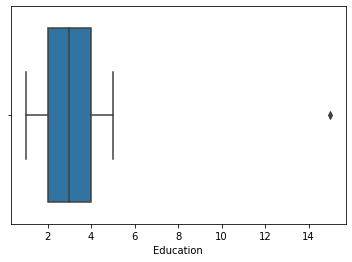

In [242]:
sns.boxplot(x="Education", data=data)

In [243]:
data["Education"].value_counts()

3     681
4     464
2     304
1     182
5      44
15      1
Name: Education, dtype: int64

In [244]:
data["Education"] = np.where(data["Education"] == 15, 5, data["Education"])

In [245]:
data["Education"].value_counts()

3    681
4    464
2    304
1    182
5     45
Name: Education, dtype: int64

##### The Education feature had an outlier 15, but the categorical values ranged from 1-5. Becasue it was just 1 value and the odds it was an error and the true value was 5 are high, we changed it to a 5.

#### Outliers analysis for TotalWorkingYears

In [246]:
detect_outlier2(data["TotalWorkingYears"]).value_counts()

0.693147    103
0.000000     13
Name: TotalWorkingYears, dtype: int64

In [247]:
data["TotalWorkingYears"].describe()

count    1676.000000
mean        2.254793
std         0.685953
min         0.000000
25%         1.945910
50%         2.302585
75%         2.708050
max         3.737670
Name: TotalWorkingYears, dtype: float64

In [248]:
seniors =data.loc[data["TotalWorkingYears"] > 27]

In [249]:
#
starting_age = seniors["Age"] - seniors["TotalWorkingYears"]
starting_age.value_counts()

Series([], dtype: int64)

We see some values that appear to be wrong. Some people started working in the company before 18 (might be possible but we decide to drop the ones before 16). 
The outliers of Working age had at least 27 years of experience, but here we decide to remove those fake values for the entire dataset aswell.

In [250]:
#remove those fake values
to_remove = data.loc[(data["Age"] - data["TotalWorkingYears"]) < 16]
data.drop(index = to_remove.index, inplace=True)

#### Outliers analysis for YearsAtCompany

In [251]:
detect_outlier2(data["YearsAtCompany"]).value_counts()

0.00000    54
3.73767     1
Name: YearsAtCompany, dtype: int64

In [252]:
data["YearsAtCompany"].describe()

count    1675.000000
mean        1.789458
std         0.753172
min         0.000000
25%         1.386294
50%         1.791759
75%         2.302585
max         3.737670
Name: YearsAtCompany, dtype: float64

In [253]:
data.loc[data["YearsAtCompany"]> 20].head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition


In [254]:
data.loc[data["YearsAtCompany"]> data["TotalWorkingYears"]].T

,786,1500
id,786,1500
Age,39,53
BusinessTravel,Travel_Rarely,Travel_Rarely
DailyRate,1369,1411
Department,Human Resources,Research & Development
DistanceFromHome,2.197225,0.693147
Education,3,4
EducationField,Medical,Life Sciences
EnvironmentSatisfaction,4,3
Gender,Male,Female


We have 2 rows where the number of years at the company is higher than the number of total working years. 
As the difference is 1 for both, we assume it might be due to a difference in the month of encoding, and will replace the value
of YearsAtCompany by the value of TotalWorkingYears.

In [255]:
data["YearsAtCompany"] = np.where( data["YearsAtCompany"]> data["TotalWorkingYears"] , data["TotalWorkingYears"], data["YearsAtCompany"])

In [256]:
data.loc[data["YearsAtCompany"]< data["YearsInCurrentRole"]]

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1,1,35,Travel_Rarely,921,Sales,2.197225,3,Other,1,Male,...,4,1,1.609438,3,3,1.609438,2,0.000000,3,0
2,2,32,Travel_Rarely,718,Sales,3.295837,3,Marketing,3,Male,...,4,2,1.609438,3,3,1.386294,2,0.693147,2,0
4,4,50,Travel_Rarely,1017,Research & Development,1.791759,4,Medical,2,Female,...,3,0,3.465736,0,3,3.465736,14,1.609438,10,1
7,7,40,Travel_Rarely,1009,Research & Development,1.098612,3,Life Sciences,4,Male,...,4,1,1.945910,3,2,1.386294,2,0.693147,2,0
8,8,51,Travel_Frequently,1297,Sales,1.945910,3,Life Sciences,4,Male,...,1,1,2.944439,3,3,2.833213,14,1.609438,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,1668,44,Travel_Rarely,636,Research & Development,2.302585,1,Medical,2,Female,...,2,1,3.178054,0,2,1.098612,2,1.098612,2,0
1669,1669,44,Travel_Rarely,848,Research & Development,1.098612,3,Medical,1,Female,...,4,0,1.945910,2,3,1.098612,2,1.098612,2,0
1671,1671,55,Travel_Rarely,1276,Research & Development,2.833213,4,Medical,1,Male,...,2,3,2.564949,3,3,2.397895,9,1.945910,7,0
1673,1673,32,Travel_Rarely,1303,Research & Development,1.098612,3,Life Sciences,1,Male,...,4,1,2.397895,3,4,1.609438,2,0.693147,3,0


In [257]:
data["YearsInCurrentRole"] = np.where( data["YearsAtCompany"]< data["YearsInCurrentRole"] , data["YearsAtCompany"], data["YearsInCurrentRole"])

We keep analyzing those kind of potential mistakes. We change the value of YearsInCurrentRole for this employee to the value of YearsAtCompany, for the same reason

Other than that, no need to remove the outliers of years at company.

#### Outliers analysis for JobLevel

In [258]:
detect_outlier2(data["JobLevel"]).value_counts()

4    94
5    75
7     1
Name: JobLevel, dtype: int64

In [259]:
data["JobLevel"].describe()

count    1675.000000
mean        1.998806
std         1.083160
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         7.000000
Name: JobLevel, dtype: float64

In [260]:
data.loc[data["JobLevel"] == 7]

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1535,1535,30,Travel_Rarely,583,Research & Development,1.94591,3,Life Sciences,4,Female,...,4,0,2.564949,1,2,2.197225,2.197225,0.693147,5,0


In [261]:
data.loc[data["JobLevel"] == 5]

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
4,4,50,Travel_Rarely,1017,Research & Development,1.791759,4,Medical,2,Female,...,3,0,3.465736,0,3,3.465736,3.465736,1.609438,10,1
22,22,51,Travel_Rarely,1107,Human Resources,1.098612,3,Human Resources,1,Male,...,4,0,3.526361,2,3,3.465736,3.465736,1.945910,13,0
39,39,42,Travel_Frequently,933,Research & Development,0.693147,4,Life Sciences,2,Male,...,1,1,3.218876,1,3,3.044522,3.044522,0.000000,13,0
64,64,50,Travel_Rarely,319,Research & Development,2.772589,2,Life Sciences,4,Male,...,3,1,3.178054,3,3,1.609438,1.000000,0.000000,3,0
67,67,43,Travel_Rarely,999,Research & Development,2.397895,3,Medical,3,Female,...,4,0,3.091042,6,3,3.044522,3.044522,1.386294,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1551,60,Travel_Rarely,616,Research & Development,1.791759,4,Medical,4,Male,...,1,0,3.178054,2,3,0.693147,0.693147,0.000000,0,0
1580,1580,50,Travel_Rarely,930,Sales,2.079442,4,Life Sciences,3,Female,...,1,1,3.135494,3,3,0.693147,0.000000,0.000000,0,0
1649,1649,48,Travel_Rarely,1234,Sales,1.609438,4,Marketing,1,Male,...,4,0,3.610918,3,3,3.135494,3.135494,1.386294,11,0
1656,1656,46,Travel_Rarely,783,Sales,0.693147,2,Marketing,4,Male,...,3,1,3.258097,2,3,2.079442,1.000000,0.693147,7,0


Nothing seems anormal in the job level outliers aswell, we will keep it.

#### Outliers analysis for NumCompaniesWorked

In [262]:
detect_outlier2(data["NumCompaniesWorked"]).value_counts()

Series([], Name: NumCompaniesWorked, dtype: int64)

In [263]:
data["NumCompaniesWorked"].describe()

count    1675.000000
mean        1.048076
std         0.673782
min         0.000000
25%         0.693147
50%         0.693147
75%         1.609438
max         2.302585
Name: NumCompaniesWorked, dtype: float64

We keep them.

#### Outliers analysis for PercentSalaryHike

In [264]:
detect_outlier2(data["PercentSalaryHike"]).value_counts()

25    10
Name: PercentSalaryHike, dtype: int64

In [265]:
data["PercentSalaryHike"].describe()

count    1675.000000
mean       14.902687
std         3.420643
min        11.000000
25%        12.000000
50%        14.000000
75%        17.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

We keep them

#### Outliers analysis for PerformanceRating

In [266]:
detect_outlier2(data["PerformanceRating"]).value_counts()

4    214
Name: PerformanceRating, dtype: int64

In [267]:
data["PerformanceRating"].describe()

count    1675.000000
mean        3.127761
std         0.333923
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: PerformanceRating, dtype: float64

#### Outliers analysis for StockOptionLevel

In [268]:
detect_outlier2(data["StockOptionLevel"]).value_counts()

3    65
Name: StockOptionLevel, dtype: int64

In [269]:
data["StockOptionLevel"].describe()

count    1675.000000
mean        0.721194
std         0.771660
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: StockOptionLevel, dtype: float64

Simply the maximum but we keep them

#### Outliers analysis for TrainingTimesLastYear

In [270]:
detect_outlier2(data["TrainingTimesLastYear"]).value_counts()

5    122
0     50
6     39
Name: TrainingTimesLastYear, dtype: int64

In [271]:
data["TrainingTimesLastYear"].describe()

count    1675.000000
mean        2.733134
std         1.145797
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64

Looks normal

#### Outliers analysis for YearsInCurrentRole

In [272]:
detect_outlier2(data["YearsInCurrentRole"]).value_counts()

Series([], Name: YearsInCurrentRole, dtype: int64)

In [273]:
data["YearsInCurrentRole"].describe()

count    1675.000000
mean        1.630009
std         0.936411
min         0.000000
25%         1.098612
50%         1.791759
75%         2.302585
max         3.737670
Name: YearsInCurrentRole, dtype: float64

In [274]:
len(data)

1675

#### Outliers analysis for YearsSinceLastPromotion

In [275]:
detect_outlier2(data["YearsSinceLastPromotion"]).value_counts()

2.772589    12
Name: YearsSinceLastPromotion, dtype: int64

In [276]:
data["YearsSinceLastPromotion"].describe()

count    1675.000000
mean        0.725668
std         0.794760
min         0.000000
25%         0.000000
50%         0.693147
75%         1.098612
max         2.772589
Name: YearsSinceLastPromotion, dtype: float64

In [277]:
data.loc[data["YearsSinceLastPromotion"] > 9]

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition


For all the previous features (from job level), the data seemed normal to us. The outliers were simply the minimum or maximum values but they all seem possible. So we decide not to remove those

## BIVARIATE ANALYSIS

#### 1. Travel Impact on attrition

Text(0.5, 1.0, 'Attrition per Business Travel')

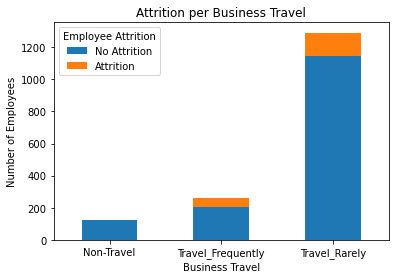

In [278]:
travel_impact = pd.crosstab(data["BusinessTravel"], data["Attrition"])
travel_impact.plot(kind = "bar", stacked = True, rot=0)

# Graph labels 
plt.xlabel("Business Travel")
plt.ylabel("Number of Employees")
plt.legend(title="Employee Attrition", labels=["No Attrition", "Attrition"])
plt.title("Attrition per Business Travel")

In [279]:
travel_impact ["perc"] = (travel_impact[1] / (travel_impact[0] + travel_impact[1]))*100 
travel_impact

Attrition,0,1,perc
BusinessTravel,,,
Non-Travel,121,5,3.968254
Travel_Frequently,208,51,19.691120
Travel_Rarely,1146,144,11.162791


#### 2. Department Impact on Attrition

Text(0.5, 1.0, 'Attrition per Department')

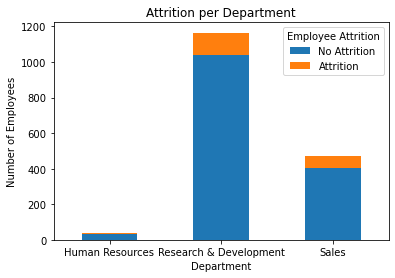

In [280]:
department_impact = pd.crosstab(data["Department"], data["Attrition"])
department_impact.plot(kind = "bar", stacked = True, rot=0)

# Graph labels 
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.legend(title="Employee Attrition", labels=["No Attrition", "Attrition"])
plt.title("Attrition per Department")

In [281]:
department_impact ["perc"] = (department_impact[1] / (department_impact[0] + department_impact[1]))*100 
department_impact

Attrition,0,1,perc
Department,,,
Human Resources,32,7,17.948718
Research & Development,1039,126,10.815451
Sales,404,67,14.225053


#### 3. Gender Impact on Attrition

Text(0.5, 1.0, 'Attrition per Gender')

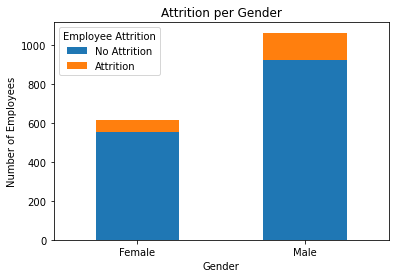

In [282]:
gender_impact = pd.crosstab(data["Gender"], data["Attrition"])
gender_impact.plot(kind = "bar", stacked = True, rot=0)

# Graph labels 
plt.xlabel("Gender")
plt.ylabel("Number of Employees")
plt.legend(title="Employee Attrition", labels=["No Attrition", "Attrition"])
plt.title("Attrition per Gender")

In [283]:
gender_impact ["perc"] = (gender_impact[1] / (gender_impact[0] + gender_impact[1]))*100 
gender_impact

Attrition,0,1,perc
Gender,,,
Female,551,62,10.114192
Male,924,138,12.994350


#### 4. Marital Status

Text(0.5, 1.0, 'Attrition per Marital Status')

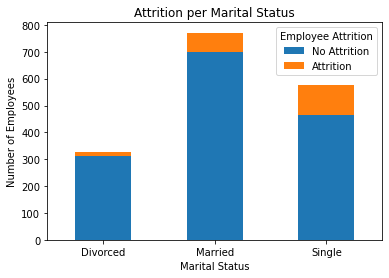

In [284]:
marital_impact = pd.crosstab(data["MaritalStatus"], data["Attrition"])
marital_impact.plot(kind = "bar", stacked = True, rot=0)

# Graph labels 
plt.xlabel("Marital Status")
plt.ylabel("Number of Employees")
plt.legend(title="Employee Attrition", labels=["No Attrition", "Attrition"])
plt.title("Attrition per Marital Status")

In [285]:
marital_impact ["perc"] = (marital_impact[1] / (marital_impact[0] + marital_impact[1]))*100 
marital_impact

Attrition,0,1,perc
MaritalStatus,,,
Divorced,311,16,4.892966
Married,701,70,9.079118
Single,463,114,19.757366


#### 5. Overtime

Text(0.5, 1.0, 'Attrition per Overtime')

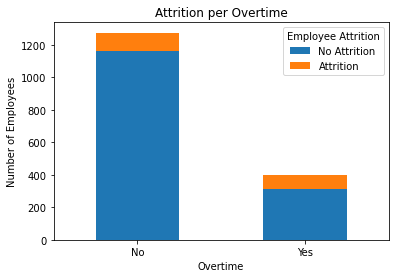

In [286]:
overtime_impact = pd.crosstab(data["OverTime"], data["Attrition"])
overtime_impact.plot(kind = "bar", stacked = True, rot=0)

# Graph labels 
plt.xlabel("Overtime")
plt.ylabel("Number of Employees")
plt.legend(title="Employee Attrition", labels=["No Attrition", "Attrition"])
plt.title("Attrition per Overtime")

In [287]:
overtime_impact ["perc"] = (overtime_impact[1] / (overtime_impact[0] + overtime_impact[1]))*100 
overtime_impact

Attrition,0,1,perc
OverTime,,,
No,1163,112,8.784314
Yes,312,88,22.000000


#### 6. Job Level

Text(0.5, 1.0, 'Attrition per Job Level')

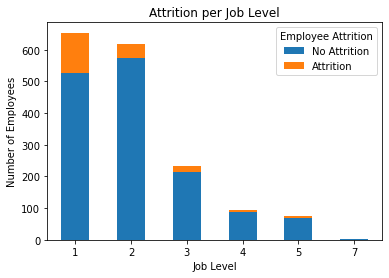

In [288]:
joblevel_impact = pd.crosstab(data["JobLevel"], data["Attrition"])
joblevel_impact.plot(kind = "bar", stacked = True, rot=0)

# Graph labels 
plt.xlabel("Job Level")
plt.ylabel("Number of Employees")
plt.legend(title="Employee Attrition", labels=["No Attrition", "Attrition"])
plt.title("Attrition per Job Level")

In [289]:
joblevel_impact ["perc"] = (joblevel_impact[1] / (joblevel_impact[0] + joblevel_impact[1]))*100 
joblevel_impact

Attrition,0,1,perc
JobLevel,,,
1,527,127,19.418960
2,575,42,6.807131
3,213,21,8.974359
4,89,5,5.319149
5,70,5,6.666667
7,1,0,0.000000


#### 7. Job Satisfaction

Text(0.5, 1.0, 'Attrition per Job Satisfaction')

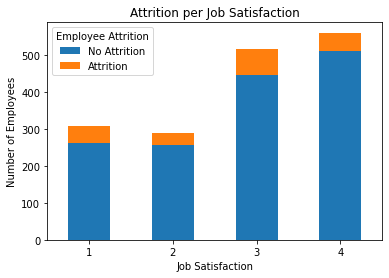

In [290]:
jobsatis_impact = pd.crosstab(data["JobSatisfaction"], data["Attrition"])
jobsatis_impact.plot(kind = "bar", stacked = True, rot=0)

# Graph labels 
plt.xlabel("Job Satisfaction")
plt.ylabel("Number of Employees")
plt.legend(title="Employee Attrition", labels=["No Attrition", "Attrition"])
plt.title("Attrition per Job Satisfaction")

In [291]:
jobsatis_impact ["perc"] = (jobsatis_impact[1] / (jobsatis_impact[0] + jobsatis_impact[1]))*100 
jobsatis_impact

Attrition,0,1,perc
JobSatisfaction,,,
1,262,47,15.210356
2,256,34,11.724138
3,447,69,13.372093
4,510,50,8.928571


#### 8. Worklife Balance

Text(0.5, 1.0, 'Attrition per Work Life Balance')

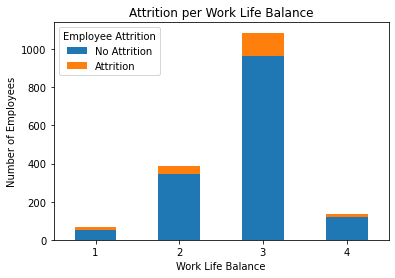

In [292]:
workbalance_impact = pd.crosstab(data["WorkLifeBalance"], data["Attrition"])
workbalance_impact.plot(kind = "bar", stacked = True, rot=0)

# Graph labels 
plt.xlabel("Work Life Balance")
plt.ylabel("Number of Employees")
plt.legend(title="Employee Attrition", labels=["No Attrition", "Attrition"])
plt.title("Attrition per Work Life Balance")

In [293]:
workbalance_impact ["perc"] = (jobsatis_impact[1] / (jobsatis_impact[0] + jobsatis_impact[1]))*100 
workbalance_impact

Attrition,0,1,perc
WorkLifeBalance,,,
1,50,18,15.210356
2,343,42,11.724138
3,963,124,13.372093
4,119,16,8.928571


#### 9. Number Companies Worked

Text(0.5, 1.0, 'Attrition per Number of Companies Worked')

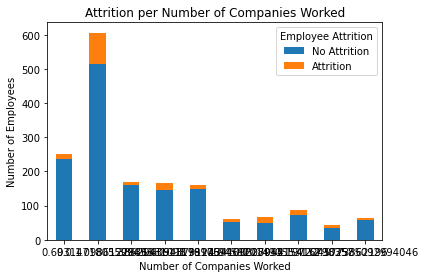

In [294]:
numcomp_impact = pd.crosstab(data["NumCompaniesWorked"], data["Attrition"])
numcomp_impact.plot(kind = "bar", stacked = True, rot=0)

# Graph labels 
plt.xlabel("Number of Companies Worked")
plt.ylabel("Number of Employees")
plt.legend(title="Employee Attrition", labels=["No Attrition", "Attrition"])
plt.title("Attrition per Number of Companies Worked")

In [295]:
numcomp_impact ["perc"] = (numcomp_impact[1] / (numcomp_impact[0] + numcomp_impact[1]))*100 
numcomp_impact

Attrition,0,1,perc
NumCompaniesWorked,,,
0.000000,237,15,5.952381
0.693147,514,92,15.181518
1.098612,161,8,4.733728
1.386294,145,20,12.121212
1.609438,148,13,8.074534
1.791759,53,8,13.114754
1.945910,50,18,26.470588
2.079442,73,15,17.045455
2.197225,35,7,16.666667


#### 10. Age

In [296]:
# Age Bin
bins = [10, 25, 32, 39, 47, 55, 100]
labels = ['18-25', '26-32', '33-39', '40-47', '48-55','55+' ]

# use the cut function to create a new column with categories based on age ranges
data['AgeRange'] = pd.cut(data['Age'], bins=bins, labels=labels)

Text(0.5, 1.0, 'Attrition per Age Range')

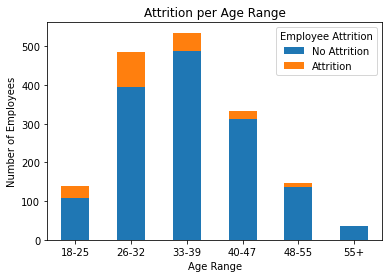

In [297]:
age_impact = pd.crosstab(data["AgeRange"], data["Attrition"])
age_impact.plot(kind = "bar", stacked = True, rot=0)

# Graph labels 
plt.xlabel("Age Range")
plt.ylabel("Number of Employees")
plt.legend(title="Employee Attrition", labels=["No Attrition", "Attrition"])
plt.title("Attrition per Age Range")

In [298]:
age_impact ["perc"] = (age_impact[1] / (age_impact[0] + age_impact[1]))*100 
age_impact

Attrition,0,1,perc
AgeRange,,,
18-25,108,31,22.302158
26-32,396,90,18.518519
33-39,487,48,8.971963
40-47,312,20,6.024096
48-55,137,10,6.802721
55+,35,1,2.777778


#### 11. Montly Rate

In [299]:
# Age Bin
bins = [0, 3000, 6000, 9000, 12000, 15000, 18000, 21000, 25000, 28000]
labels = ['0-3,000', '3,001-6,000', '6,001-9,000', '9,001-12,000', '12,001-15,000','15,001-18,000','18,001-21,000', '21,001-25,000', '25,001-28,000' ]

# use the cut function to create a new column with categories based on age ranges
data['MonthlyRange'] = pd.cut(data['MonthlyRate'], bins=bins, labels=labels)

In [300]:
data["MonthlyRange"].value_counts()

21,001-25,000    296
15,001-18,000    254
3,001-6,000      220
6,001-9,000      198
18,001-21,000    190
12,001-15,000    181
9,001-12,000     177
25,001-28,000    123
0-3,000           36
Name: MonthlyRange, dtype: int64

Text(0.5, 1.0, 'Attrition per Monthly Rate')

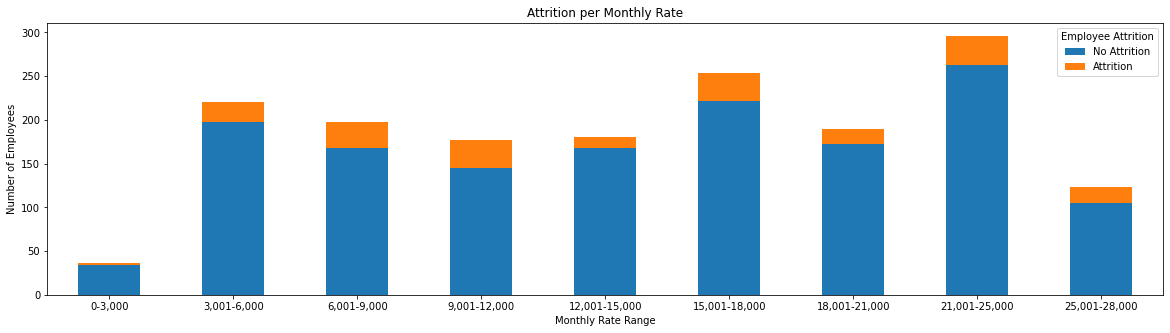

In [301]:
wage_impact = pd.crosstab(data["MonthlyRange"], data["Attrition"])
wage_impact.plot(kind = "bar", stacked = True, rot=0, figsize = (20,5))

# Graph labels 
plt.xlabel("Monthly Rate Range")
plt.ylabel("Number of Employees")
plt.legend(title="Employee Attrition", labels=["No Attrition", "Attrition"])
plt.title("Attrition per Monthly Rate")

In [302]:
wage_impact ["perc"] = (wage_impact[1] / (wage_impact[0] + wage_impact[1]))*100 
wage_impact

Attrition,0,1,perc
MonthlyRange,,,
"0-3,000",34,2,5.555556
"3,001-6,000",198,22,10.000000
"6,001-9,000",168,30,15.151515
"9,001-12,000",145,32,18.079096
"12,001-15,000",168,13,7.182320
"15,001-18,000",222,32,12.598425
"18,001-21,000",172,18,9.473684
"21,001-25,000",263,33,11.148649
"25,001-28,000",105,18,14.634146


### Insights: 
- Travel: eventhough most employees don't have to travel regularly, those who travel frequently have the highest attrition rate (19%)
- Gender: male employees have higher attrition rate than female employees (13% vs 10% respectively)
- Marital Status: employees who are single have by far the highest attrition rate (19%) than those who are married or divorced (9% and 5% respectiveley)
- Overtime: 22% of employees who work overtime (~400) end up leaving the company 
- Job level: lower job levels tend to have higher attrition rates. The job level with the highest attrition rate is level 1 which has an attrition rate of 19%
- Job Satisfaction: job satisfaction also has a direct relationship with turnover. The lower the satisfaction, the higher the turnover. Those least satisfied have a turnover rate of 15% vs those most satisfied 9%
- Work life balance: same relationship as in job satisfaction. The lower the work life balance, the higher the turnover rate
- Number companies worked: employees who have worked in 1 company before or from 6-8 companies before have the highest attrition rates ranging from 15%-26% (being the highest 6 companies before)
- Age range: employees who have the highest turnover rates are young people (18-25 yrs) and young adults (26-32) with rates of 22% and 19% respectiveley

## Feature Engineering

In this section we try enriching the dataset with some new features. We will analyze their importance for the classification of the different algorithms later

In [303]:
data["years_per_company"] = data["TotalWorkingYears"] / (np.where(data["NumCompaniesWorked"]== 0,1,data["NumCompaniesWorked"]))
data.replace([np.inf, -np.inf], 0, inplace=True)

In [304]:
(data["years_per_company"]== "inf").sum()

0

In [305]:
data["current_role_duration_by_total_length"] = data["YearsInCurrentRole"] / data["YearsAtCompany"] 
data.replace([np.inf, -np.inf], 0, inplace=True)

In [306]:
data.replace([np.inf, -np.inf], 0, inplace=True)

In [307]:
data["current_role_duration_by_total_length"].fillna(0, inplace=True)

In [308]:
(data["current_role_duration_by_total_length"] == "inf").sum()

0

In [309]:
data.loc[data["NumCompaniesWorked"]== 0, "NumCompaniesWorked"].count()

252

In [310]:
data.loc[data["TotalWorkingYears"]== 0, "TotalWorkingYears"].count()

13

In [311]:
data['YearsAtCompany_by_TotalWorkingYears'] = data["YearsAtCompany"] / (np.where(data['TotalWorkingYears']== 0,1,data['TotalWorkingYears']))
data.replace([np.inf, -np.inf], 0, inplace=True)

In [312]:
(data['YearsAtCompany_by_TotalWorkingYears'] == "inf").sum()

0

In [313]:
data['YearsAtCompany_by_TotalWorkingYears'].isnull().sum()

0

In [314]:
data.loc[data["TotalWorkingYears"]== 0, "TotalWorkingYears"].count()

13

In [315]:
data['YearsSinceLastPromotion_by_YearsWithCurrManager'] = data['YearsSinceLastPromotion'] / (np.where(data["YearsWithCurrManager"]== 0,1, data["YearsWithCurrManager"])) 
data.replace([np.inf, -np.inf], 0, inplace=True)

In [316]:
(data['YearsSinceLastPromotion_by_YearsWithCurrManager'] == "inf").sum()

0

In [317]:
data.loc[data["YearsWithCurrManager"]== 0, "YearsWithCurrManager"].count()

297

In [318]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1675 entries, 0 to 1676
Data columns (total 38 columns):
 #   Column                                           Non-Null Count  Dtype   
---  ------                                           --------------  -----   
 0   id                                               1675 non-null   int64   
 1   Age                                              1675 non-null   int64   
 2   BusinessTravel                                   1675 non-null   object  
 3   DailyRate                                        1675 non-null   int64   
 4   Department                                       1675 non-null   object  
 5   DistanceFromHome                                 1675 non-null   float64 
 6   Education                                        1675 non-null   int64   
 7   EducationField                                   1675 non-null   object  
 8   EnvironmentSatisfaction                          1675 non-null   int64   
 9   Gender             

In [319]:
data.isnull().mean()

id                                                 0.0
Age                                                0.0
BusinessTravel                                     0.0
DailyRate                                          0.0
Department                                         0.0
DistanceFromHome                                   0.0
Education                                          0.0
EducationField                                     0.0
EnvironmentSatisfaction                            0.0
Gender                                             0.0
HourlyRate                                         0.0
JobInvolvement                                     0.0
JobLevel                                           0.0
JobRole                                            0.0
JobSatisfaction                                    0.0
MaritalStatus                                      0.0
MonthlyIncome                                      0.0
MonthlyRate                                        0.0
NumCompani

## Correlation Analysis

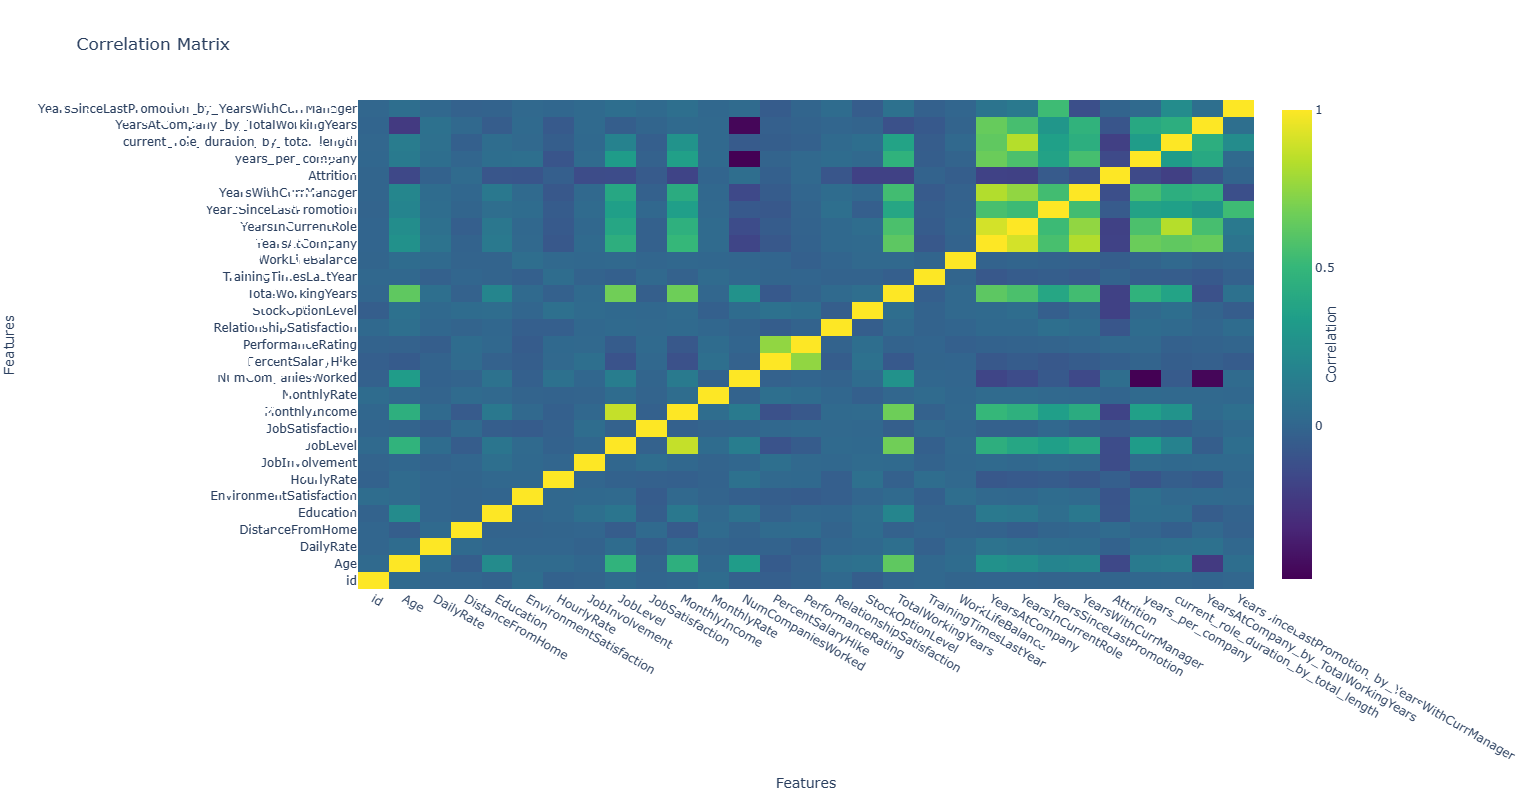

In [320]:
corr = data.corr()

# plot correlation matrix with plotly
fig = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.columns,
    colorscale='Viridis',
    colorbar=dict(
        title="Correlation",
        titleside="right",
        tickmode="array",
        tickvals=[-1, -0.5, 0, 0.5, 1],
        ticktext=["-1", "-0.5", "0", "0.5", "1"]
    )
))
fig.update_layout(
    title="Correlation Matrix",
    xaxis_title="Features",
    yaxis_title="Features",
    width=800,
    height=800
)
fig.show()

<AxesSubplot:>

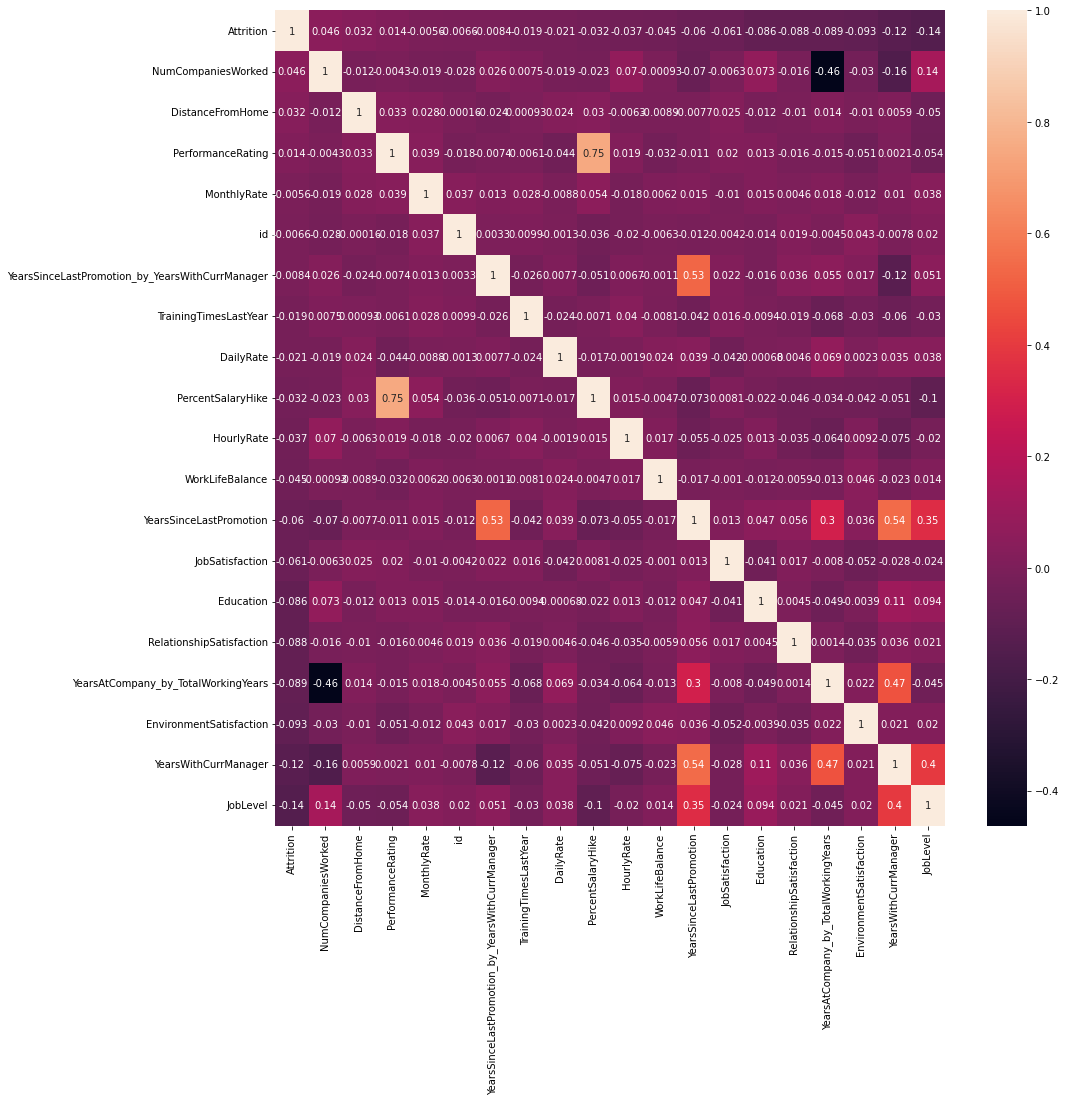

In [321]:
col = data.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(data[col].corr(), annot=True, annot_kws={"size":10})

#### 1. First we suspect that DailyRate, HourlyRate and MonthlyRate to be correlated:

In [322]:
data[['MonthlyRate','HourlyRate','DailyRate']].corr()

,MonthlyRate,HourlyRate,DailyRate
MonthlyRate,1.000000,-0.018148,-0.008777
HourlyRate,-0.018148,1.000000,-0.001920
DailyRate,-0.008777,-0.001920,1.000000


##### Surprisingly, we find out that they are not correlated, for this reason we decide to keep these 3 features.

#### 2. Next, we suspect that there would be a correlation between the features YearsAtCompany, YearsWithCurrManager, YearsInCurrentRole and YearsSinceLastPromotion:

In [323]:
data[['YearsAtCompany', 'YearsWithCurrManager', 'YearsInCurrentRole','YearsSinceLastPromotion']].corr()

,YearsAtCompany,YearsWithCurrManager,YearsInCurrentRole,YearsSinceLastPromotion
YearsAtCompany,1.000000,0.829163,0.902811,0.561547
YearsWithCurrManager,0.829163,1.000000,0.750992,0.543830
YearsInCurrentRole,0.902811,0.750992,1.000000,0.524126
YearsSinceLastPromotion,0.561547,0.543830,0.524126,1.000000


##### As suspected, the first 3 features are indeed highly correlated (the last one not as much), for this reason we will drop two of them and keep one (we decide to keep YearsAtCompany).

#### 3. By looking at the correlation matrix that we did before, it seems that PerformanceRating and PercentSalaryHike are highly correlated:

In [324]:
data[['PerformanceRating','PercentSalaryHike']].corr()

,PerformanceRating,PercentSalaryHike
PerformanceRating,1.000000,0.752485
PercentSalaryHike,0.752485,1.000000


##### We decide to drop the categorical-like feature PerformanceRating and keep PerformanceRating because of their high correlation.

#### 4. We also need to check if the new feature we added YearsAtCompany_by_TotalWorkingYears is correlated with the original features:

In [325]:
data[['YearsAtCompany_by_TotalWorkingYears',"YearsAtCompany",'TotalWorkingYears']].corr()

,YearsAtCompany_by_TotalWorkingYears,YearsAtCompany,TotalWorkingYears
YearsAtCompany_by_TotalWorkingYears,1.000000,0.647675,-0.113280
YearsAtCompany,0.647675,1.000000,0.622293
TotalWorkingYears,-0.113280,0.622293,1.000000


##### Since there is no high correlation (higher than 0.7) we keep the three features.

#### 5. Let us also check if the new feature YearsSinceLastPromotion_by_YearsWithCurrManager is correlated with the original features:

In [326]:
data[['YearsSinceLastPromotion_by_YearsWithCurrManager','YearsSinceLastPromotion',"YearsWithCurrManager"] ].corr()

,YearsSinceLastPromotion_by_YearsWithCurrManager,YearsSinceLastPromotion,YearsWithCurrManager
YearsSinceLastPromotion_by_YearsWithCurrManager,1.000000,0.530452,-0.120756
YearsSinceLastPromotion,0.530452,1.000000,0.543830
YearsWithCurrManager,-0.120756,0.543830,1.000000


##### Since there are no high correlations between the three features we keep all of them.

### We suspect that some categorical values are correlated , so we run chi-square tests to check:

#### 6. Checking correlation for Department and EducationField

In [327]:
CrosstabResult=pd.crosstab(index=data['Department'],columns=data['EducationField'])
print(CrosstabResult)

EducationField          Human Resources  Life Sciences  Marketing  Medical  \
Department                                                                   
Human Resources                      13             16          0        8   
Research & Development                0            553          0      459   
Sales                                 0            204        152       82   

EducationField          Other  Technical Degree  
Department                                       
Human Resources             1                 1  
Research & Development     67                86  
Sales                      14                19  


In [328]:
from scipy.stats import chi2_contingency

ChiSqResult = chi2_contingency(CrosstabResult)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 2.7158612274098287e-208


##### Since the p-value of the test is almost 0 then we reject the null hypothesis that they're independant, Department and EducationField are very correlated.

#### 7. Checking correlation for JobRole and EducationField

In [329]:
CrosstabResult=pd.crosstab(index=data['JobRole'],columns=data['EducationField'])
print(CrosstabResult)

EducationField             Human Resources  Life Sciences  Marketing  Medical  \
JobRole                                                                         
Healthcare Representative                0             73          0       63   
Human Resources                         10             14          0        8   
Laboratory Technician                    0            163          0      131   
Manager                                  3             50         17       34   
Manufacturing Director                   0             98          0       71   
Research Director                        0             32          0       35   
Research Scientist                       0            157          0      127   
Sales Executive                          0            155        114       62   
Sales Representative                     0             31         21       18   

EducationField             Other  Technical Degree  
JobRole                                             
He

In [330]:
from scipy.stats import chi2_contingency

ChiSqResult = chi2_contingency(CrosstabResult)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 6.350656661424335e-145


##### JobRole and EducationField are also very correlated.

#### 8. Checking correlation for JobRole and Department

In [331]:
CrosstabResult=pd.crosstab(index=data['Department'],columns=data['JobRole'])
print(CrosstabResult)

JobRole                 Healthcare Representative  Human Resources  \
Department                                                           
Human Resources                                 0               33   
Research & Development                        154                1   
Sales                                           0                0   

JobRole                 Laboratory Technician  Manager  \
Department                                               
Human Resources                             0        6   
Research & Development                    333       66   
Sales                                       0       39   

JobRole                 Manufacturing Director  Research Director  \
Department                                                          
Human Resources                              0                  0   
Research & Development                     196                 71   
Sales                                        0                  0   

JobRole     

In [332]:
from scipy.stats import chi2_contingency

ChiSqResult = chi2_contingency(CrosstabResult)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.0


##### JobRole and Department are also highly correlated. For this reason we will drop 2 out of the 3 correlated features and keep one only (We will keep JobRole).

## SPLIT TRAINING TEST

In [333]:
data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,AgeRange,MonthlyRange,years_per_company,current_role_duration_by_total_length,YearsAtCompany_by_TotalWorkingYears,YearsSinceLastPromotion_by_YearsWithCurrManager
0,0,36,Travel_Frequently,599,Research & Development,3.218876,3,Medical,4,Male,...,0.000000,2.079442,8,0,33-39,"3,001-6,000",3.459432,0.0,1.000000,0.259930
1,1,35,Travel_Rarely,921,Sales,2.197225,3,Other,1,Male,...,1.609438,0.000000,3,0,33-39,"9,001-12,000",2.321928,1.0,1.000000,0.000000
2,2,32,Travel_Rarely,718,Sales,3.295837,3,Marketing,3,Male,...,1.386294,0.693147,2,0,26-32,"15,001-18,000",1.609438,1.0,0.861353,0.346574
3,3,38,Travel_Rarely,1488,Research & Development,1.098612,3,Medical,3,Female,...,0.000000,0.000000,2,0,33-39,"12,001-15,000",2.000000,0.0,0.701839,0.000000
4,4,50,Travel_Rarely,1017,Research & Development,1.791759,4,Medical,2,Female,...,3.465736,1.609438,10,1,48-55,"18,001-21,000",5.000000,1.0,1.000000,0.160944


In [334]:
#data=data.drop(columns='years_per_company')

In [335]:
y= data["Attrition"]
X= data.drop(columns = ["Attrition", "id"])

In [336]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# OHE Train and Test datasets

We decide to use One-Hot Encoding for the categorical values as some algorithms "require" this encoding of the categorical data. Indeed, Logistic regression and SVM for example use distance-based metrics. They calculate the distance or similarity between data points based on the values of their features. One-Hot Encoding helps represent categorical variables in a way that preserves their distinct categories.

On the other hand, random forest and tree based model can handle categorical data without tranformation (or with ordinal encoding).

In [337]:
# Instantiate encoder
ohe = OneHotEncoder(sparse=False)

In [338]:
X_train_cat = X_train.select_dtypes("object")
X_train_cat.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [339]:
# Encoding X_train
X_train_ohe = ohe.fit_transform(X_train_cat)

In [340]:
X_train_ohe = pd.DataFrame(X_train_ohe)
X_train_ohe.columns = ohe.get_feature_names_out()
X_train_ohe.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [341]:
print(f"X_train size: {X_train.shape}")
print(f"X_train_ohe size: {X_train_ohe.shape}")

X_train size: (1172, 36)
X_train_ohe size: (1172, 28)


In [342]:
# Concatenating X_train_ohe encoded with Original X_train
X_train.reset_index(drop=True, inplace=True)
X_train_ohe.reset_index(drop=True, inplace=True)

In [343]:
X_train_full_ohe = pd.concat([X_train, X_train_ohe], axis=1)
X_train_full_ohe.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,50,Travel_Rarely,623,Research & Development,2.197225,3,Life Sciences,4,Male,59,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,39,Travel_Rarely,1441,Research & Development,2.833213,5,Life Sciences,1,Male,36,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,38,Travel_Frequently,408,Research & Development,2.079442,4,Medical,4,Male,63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,39,Travel_Rarely,723,Sales,3.401197,3,Marketing,4,Female,76,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,35,Travel_Rarely,855,Sales,0.693147,4,Marketing,3,Male,82,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [344]:
# Encoding X_test
X_test_cat = X_test.select_dtypes("object")
X_test_cat.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [345]:
X_test_ohe = ohe.transform(X_test_cat)

In [346]:
X_test_ohe = pd.DataFrame(X_test_ohe)
X_test_ohe.columns = ohe.get_feature_names_out()
X_test_ohe.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [347]:
print(f"X_test size: {X_test.shape}")
print(f"X_test_ohe size: {X_test_ohe.shape}")

X_test size: (503, 36)
X_test_ohe size: (503, 28)


In [348]:
# Concatenating X_test_ohe encoded with Original X_test
X_test.reset_index(drop=True, inplace=True)
X_test_ohe.reset_index(drop=True, inplace=True)

In [349]:
X_test_ohe.shape

(503, 28)

In [350]:
X_test_full_ohe = pd.concat([X_test, X_test_ohe], axis=1)
X_test_full_ohe.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,31,Travel_Rarely,894,Research & Development,0.693147,3,Life Sciences,2,Male,43,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,38,Travel_Rarely,1093,Research & Development,1.609438,2,Medical,4,Male,72,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,27,Travel_Frequently,573,Research & Development,2.302585,4,Medical,3,Female,93,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,31,Travel_Rarely,945,Research & Development,2.302585,2,Life Sciences,4,Male,76,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,29,Travel_Frequently,1168,Research & Development,0.693147,3,Life Sciences,3,Male,88,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [351]:
X_test_full_ohe.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'AgeRange', 'MonthlyRange', 'years_per_company',
       'current_role_duration_by_total_length',
       'YearsAtCompany_by_TotalWorkingYears',
       'YearsSinceLastPromotion_by_YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Departm

# Scale

To run a log regression model or svm, we need to scale our numerical features. We will create a list with the names of the features that shouldnt be scaled, that is all original categorical columns and the hot encoded one columns that we created, but also the features that are numerical but represent a category (originally encoded) like PerformaneRating for example (is only equal to 3 or 4).  

In [352]:
encoded_col_names= ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole','MaritalStatus', 'OverTime','Education','EnvironmentSatisfaction','StockOptionLevel','TrainingTimesLastYear','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance', 'AgeRange', 'MonthlyRange','BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently','BusinessTravel_Travel_Rarely', 'Department_Human Resources','Department_Research & Development', 'Department_Sales','EducationField_Human Resources', 'EducationField_Life Sciences','EducationField_Marketing', 'EducationField_Medical','EducationField_Other', 'EducationField_Technical Degree','Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative','JobRole_Human Resources', 'JobRole_Laboratory Technician','JobRole_Manager', 'JobRole_Manufacturing Director','JobRole_Research Director', 'JobRole_Research Scientist','JobRole_Sales Executive', 'JobRole_Sales Representative','MaritalStatus_Divorced', 'MaritalStatus_Married','MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes']
encoded_col_names

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Education',
 'EnvironmentSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'JobInvolvement',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance',
 'AgeRange',
 'MonthlyRange',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_S

In [353]:
X_train_s=X_train_full_ohe
X_test_s=X_test_full_ohe

In [354]:
to_scale=X_train_s.drop(columns=encoded_col_names)

In [355]:
to_scale_test=X_test_s.drop(columns=encoded_col_names)

In [356]:
scaler = StandardScaler()
scale_model = scaler.fit(to_scale)
scaled_X_train = scale_model.transform(to_scale)
scaled_X_train_df=pd.DataFrame(scaled_X_train,columns=to_scale.columns)
scaled_X_train_df.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,years_per_company,current_role_duration_by_total_length,YearsAtCompany_by_TotalWorkingYears,YearsSinceLastPromotion_by_YearsWithCurrManager
0,1.650595,-0.716484,0.307452,-0.417645,1.889807,1.907420,1.544195,0.511323,-0.838765,1.647560,0.678631,-1.751627,1.554084,0.788182,0.321009,-2.101991,-0.494164,0.265801
1,0.349894,1.497241,1.064818,-1.585976,0.954085,0.980408,1.267261,-0.510993,-0.253452,0.085735,0.678631,0.712510,1.724113,1.067852,1.272472,0.490547,0.765227,0.203605
2,0.231648,-1.298331,0.167191,-0.214457,-0.917359,-1.137790,-0.537744,1.533640,2.087798,-0.241594,-2.397386,-1.751627,-0.923698,-1.169507,-1.201639,-2.101991,-3.217774,-0.691704
3,0.349894,-0.445857,1.741200,0.445904,0.954085,1.182510,1.359149,-0.510993,0.917173,1.242324,1.669783,1.506503,2.129609,1.347522,2.484529,0.490547,0.705283,0.226003
4,-0.123088,-0.088630,-1.483673,0.750686,0.954085,0.649245,-1.141295,-0.510993,0.624516,0.225546,0.805956,0.814508,-0.923698,1.067852,1.418987,0.490547,0.765227,-0.691704


In [357]:
X_train_s.drop(columns = to_scale.columns, inplace = True)

In [358]:
X_train_s.reset_index(drop=True, inplace=True)
scaled_X_train_df.reset_index(drop=True, inplace=True)
X_train_s = pd.concat([X_train_s, scaled_X_train_df], axis = 1)

In [359]:
to_scale_test=X_test_s.drop(columns=encoded_col_names)

In [360]:
to_scale.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobLevel',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'years_per_company', 'current_role_duration_by_total_length',
       'YearsAtCompany_by_TotalWorkingYears',
       'YearsSinceLastPromotion_by_YearsWithCurrManager'],
      dtype='object')

In [361]:
scaled_X_test = scale_model.transform(to_scale_test)
scaled_X_test_df=pd.DataFrame(scaled_X_test,columns=to_scale_test.columns)
scaled_X_test_df.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,years_per_company,current_role_duration_by_total_length,YearsAtCompany_by_TotalWorkingYears,YearsSinceLastPromotion_by_YearsWithCurrManager
0,-0.596070,0.016914,-1.483673,-1.230397,0.018363,-0.261381,0.342457,-1.533310,-0.253452,-0.663595,-0.247342,-0.029269,-0.041094,-0.610167,-0.357987,0.490547,0.359934,0.502042
1,0.231648,0.555461,-0.392511,0.242716,-0.917359,-0.158494,-1.264659,0.840436,-0.546109,0.470598,-0.003779,0.165845,-0.041094,-0.610167,-0.569035,0.490547,-0.435427,0.502042
2,-1.069053,-0.851797,0.432921,1.309453,0.018363,0.478001,1.211508,-0.510993,-0.838765,-0.241594,0.380534,0.473711,-0.923698,0.228843,0.929444,0.490547,0.765227,-0.691704
3,-0.596070,0.154934,0.432921,0.445904,0.954085,-2.364939,-0.729424,0.511323,2.087798,0.775184,-1.471412,-1.751627,-0.923698,-1.169507,-0.136098,-2.101991,-2.222023,-0.691704
4,-0.832561,0.758431,-1.483673,1.055468,-0.917359,-1.046356,-0.601402,0.511323,-0.253452,-0.437471,-0.247342,-0.029269,-0.041094,-0.610167,-0.771504,0.490547,0.076516,0.502042


In [362]:
X_test_s.drop(columns = to_scale_test.columns, inplace = True)

In [363]:
X_test_s.reset_index(drop=True, inplace=True)
scaled_X_test_df.reset_index(drop=True, inplace=True)
X_test_s = pd.concat([X_test_s, scaled_X_test_df], axis = 1)

In [364]:
X_train_s.isnull().mean()

BusinessTravel                                     0.0
Department                                         0.0
Education                                          0.0
EducationField                                     0.0
EnvironmentSatisfaction                            0.0
                                                  ... 
YearsWithCurrManager                               0.0
years_per_company                                  0.0
current_role_duration_by_total_length              0.0
YearsAtCompany_by_TotalWorkingYears                0.0
YearsSinceLastPromotion_by_YearsWithCurrManager    0.0
Length: 64, dtype: float64

In [365]:
X_train_s.head().T

,0,1,2,3,4
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely
Department,Research & Development,Research & Development,Research & Development,Sales,Sales
Education,3,5,4,3,4
EducationField,Life Sciences,Life Sciences,Medical,Marketing,Marketing
EnvironmentSatisfaction,4,1,4,4,3
...,...,...,...,...,...
YearsWithCurrManager,0.788182,1.067852,-1.169507,1.347522,1.067852
years_per_company,0.321009,1.272472,-1.201639,2.484529,1.418987
current_role_duration_by_total_length,-2.101991,0.490547,-2.101991,0.490547,0.490547
YearsAtCompany_by_TotalWorkingYears,-0.494164,0.765227,-3.217774,0.705283,0.765227


# Drop Columns

In [366]:
X_test_s.shape

(503, 64)

In [367]:
X_train_s.columns

Index(['BusinessTravel', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'AgeRange', 'MonthlyRange',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'Jo

#### On top of the columns that we chose to drop because of high correlation, we will also need to drop the original columns that were hot encoded (like JobRole for example):

In [368]:
X_train_s = X_train_s.drop(['Department', 'EducationField','PerformanceRating','JobLevel','YearsInCurrentRole','YearsWithCurrManager', 'BusinessTravel',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'], axis=1)

In [369]:
X_train_s.shape

(1172, 44)

In [370]:
X_test_s = X_test_s.drop(['Department', 'EducationField','PerformanceRating','JobLevel','YearsInCurrentRole','YearsWithCurrManager', 'BusinessTravel',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender', 
       'JobRole', 'MaritalStatus', 'OverTime'], axis=1)

In [371]:
X_test_s.shape

(503, 44)

In [372]:
X_train_s.columns

Index(['Education', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobSatisfaction', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'AgeRange', 'MonthlyRange',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_No',
       'OverTime_Yes', 'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 

# Models

As we saw above, our dataset is unbalanced. If we predict that all our employees will stay we'll have an accuracy of 88.12%.

In [373]:
y_test.value_counts()[0] / y_test.shape[0]

0.8807157057654076

In [374]:
# Took this piece of code from the same notebook as the evaluate function below
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 88.05%
Leaving Rate: 11.95%
===============TEST=================
Staying Rate: 88.07%
Leaving Rate: 11.93%


As our data is unbalanced, we need to chose scoring metrics that will take that into account:.
Accuracy is not a good metric for unbalanced data. matthews_corrcoef, cohen_kappa_score
2 good metrics to use are :
- Matthew’s Correlation Coefficient : measures the quality of a binary classifier.
- Cohen’s Kappa : tells if your classifier is performing better than guessing at random.

In [375]:
# We create a function to use after the training if our models, that score the results based on different metrics
# We took this function from this notebook and enriched it with our metrics: https://www.kaggle.com/code/faressayah/ibm-hr-analytics-employee-attrition-performance#%F0%9F%8E%AF-Comparing-Models-Prerformance-%F0%9F%93%8A
def evaluate(model, X_train_s, X_test_s, y_train, y_test):
    y_test_pred = model.predict(X_test_s)
    y_train_pred = model.predict(X_train_s)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"ROC_AUC:\n{roc_auc_score(y_train, y_train_pred)}")
    print(f"MCC:\n{matthews_corrcoef(y_train, y_train_pred)}")
    print(f"Cohen’s Kappa:\n{cohen_kappa_score(y_train, y_train_pred)}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"ROC_AUC:\n{roc_auc_score(y_test, y_test_pred)}")
    print(f"MCC:\n{matthews_corrcoef(y_test, y_test_pred)}")
    print(f"Cohen’s Kappa:\n{cohen_kappa_score(y_test, y_test_pred)}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [376]:
#We take this feature from the same kaggle notebook as the previous cell

def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

## SVM

In [163]:
X_train_s_svm = X_train_s.drop(['AgeRange', 'MonthlyRange'], axis=1)
X_test_s_svm = X_test_s.drop(['AgeRange', 'MonthlyRange'], axis=1)

In [164]:
# Instantiating the model
svm_clf1 = SVC(C=1 ,kernel='linear')

In [165]:
print("Cross-validated Accuracy = {:.4f}".format(np.mean(cross_val_score(svm_clf1, X_train_s_svm, y_train, cv=5))))

Cross-validated Accuracy = 0.8823


In [166]:
# Instantiating the model with rbf
svm_clf_rbf1 = SVC(C=1 ,kernel='rbf')

In [167]:
print("Cross-validated Accuracy = {:.4f}".format(np.mean(cross_val_score(svm_clf_rbf1, X_train_s_svm, y_train, cv=5))))

Cross-validated Accuracy = 0.8814


#### SVM with GridSearchCV

In [168]:
svm_classif =SVC(random_state= 35)

In [169]:
param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

search = GridSearchCV(svm_classif, param_grid=param_grid, scoring='roc_auc', cv=3, refit=True, verbose=1)
search.fit(X_train_s_svm, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(random_state=35),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc', verbose=1)

In [170]:
svm_clf = SVC(**search.best_params_)
svm_clf.fit(X_train_s_svm, y_train)

evaluate(svm_clf, X_train_s_svm, X_test_s_svm, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1030    2]
 [ 131    9]]
ACCURACY SCORE:
0.8865
ROC_AUC:
0.5311738648947951
MCC:
0.2097065804641239
Cohen’s Kappa:
0.103604536148874
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.887166    0.818182  0.886519     0.852674      0.878926
recall        0.998062    0.064286  0.886519     0.531174      0.886519
f1-score      0.939352    0.119205  0.886519     0.529279      0.841383
support    1032.000000  140.000000  0.886519  1172.000000   1172.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[441   2]
 [ 57   3]]
ACCURACY SCORE:
0.8827
ROC_AUC:
0.5227426636568848
MCC:
0.1486103780588902
Cohen’s Kappa:
0.07533883782520645
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.885542   0.600000  0.882704    0.742771      0.851481
recall       0.995485   0.050000  0.882704    0.522743      0.882704
f1-score     0.937301   0.092308  0.882704    0

In [171]:
scores_dict = {
    'Support Vector Machine': {
        'Train': roc_auc_score(y_train, svm_clf.predict(X_train_s_svm)),
        'Test': roc_auc_score(y_test, svm_clf.predict(X_test_s_svm)),
    },
}

### Logistic Regression

In [533]:
X_train_s_svm = X_train_s.drop([ 'AgeRange', 'MonthlyRange'], axis=1)
X_test_s_svm = X_test_s.drop([ 'AgeRange', 'MonthlyRange'], axis=1)

KeyError: "['AgeRange', 'MonthlyRange'] not found in axis"

In [534]:
from sklearn.linear_model import LogisticRegression

for w in [1,5,10]:
    print('---Weight of {} for Attrition class---'.format(w))
    lr_clf = LogisticRegression(solver='liblinear', penalty='l1', class_weight = {0:1, 1:w})
    lr_clf.fit(X_train_s_svm, y_train)

    evaluate(lr_clf, X_train_s_svm, X_test_s_svm, y_train, y_test)

---Weight of 1 for Attrition class---
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1016   16]
 [ 105   35]]
ACCURACY SCORE:
0.8968
ROC_AUC:
0.6172480620155039
MCC:
0.3727791732571945
Cohen’s Kappa:
0.3233256351039261
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.906334    0.686275  0.896758     0.796304      0.880047
recall        0.984496    0.250000  0.896758     0.617248      0.896758
f1-score      0.943799    0.366492  0.896758     0.655146      0.874838
support    1032.000000  140.000000  0.896758  1172.000000   1172.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[435   8]
 [ 35  25]]
ACCURACY SCORE:
0.9145
ROC_AUC:
0.699303987960873
MCC:
0.5218162192378004
Cohen’s Kappa:
0.494873770989514
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.925532   0.757576  0.914513    0.841554      0.905497
recall       0.981941   0.416667  0.914513    0.699304      0.914513
f1-score   

We select the one with the highest roc_auc score for training and test. In this case it is the model with a weight of 5 for the minority class

In [535]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1', class_weight = {0:1, 1:5})
lr_clf.fit(X_train_s_svm, y_train)

LogisticRegression(class_weight={0: 1, 1: 5}, penalty='l1', solver='liblinear')

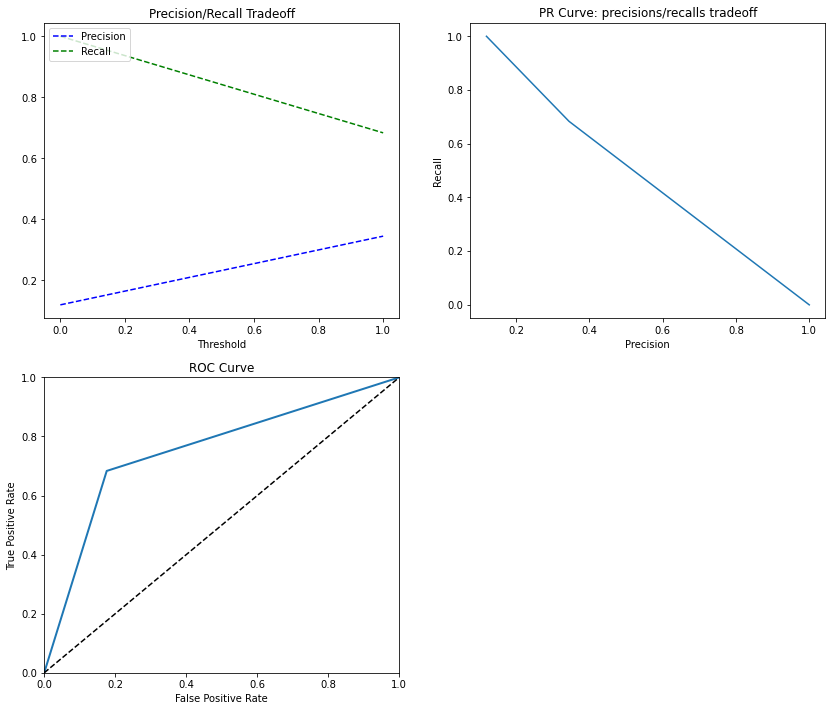

In [536]:
# We take this code for every model from the same previous notebook
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
    
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test_s_svm))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test_s_svm))
plot_roc_curve(fpr, tpr)

In [537]:
scores_dict['Logistic Regression'] = {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train_s_svm)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test_s_svm)),
    }

## XGBoost

In [377]:
X_train_xgb = X_train_s.drop([ 'AgeRange', 'MonthlyRange'], axis=1)
X_test_xgb = X_test_s.drop([ 'AgeRange', 'MonthlyRange'], axis=1)

In [378]:
xgb_tree = xgb.XGBClassifier(objective="binary:logistic", eval_metric="auc", verbosity=0, random_state=75)

In [379]:
params = {
    "learning_rate": (0.025, 0.1, 0.25), 
    "n_estimators" : (100,150), 
    "max_depth": (2,5,10),
    "gamma": (0,0.5)
}

In [380]:
xgb_model_rands= RandomizedSearchCV(xgb_tree, param_distributions= params, n_iter=25, cv=5, return_train_score=True)
xgb_model_rands.fit(X_train_xgb, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           max_delta_step=None, max_depth=None,
               

In [178]:
xgb_model_rands.best_params_

{'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.1, 'gamma': 0.5}

In [179]:
evaluate(xgb_model_rands, X_train_xgb, X_test_xgb, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1029    3]
 [  97   43]]
ACCURACY SCORE:
0.9147
ROC_AUC:
0.6521179401993356
MCC:
0.5081198803245025
Cohen’s Kappa:
0.42860485978392293
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.913854    0.934783  0.914676     0.924318      0.916354
recall        0.997093    0.307143  0.914676     0.652118      0.914676
f1-score      0.953661    0.462366  0.914676     0.708013      0.894974
support    1032.000000  140.000000  0.914676  1172.000000   1172.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[437   6]
 [ 46  14]]
ACCURACY SCORE:
0.8966
ROC_AUC:
0.6098946576373213
MCC:
0.3645822334560581
Cohen’s Kappa:
0.30877378435517977
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.904762   0.700000   0.89662    0.802381      0.880337
recall       0.986456   0.233333   0.89662    0.609895      0.896620
f1-score     0.943844   0.350000   0.89662   

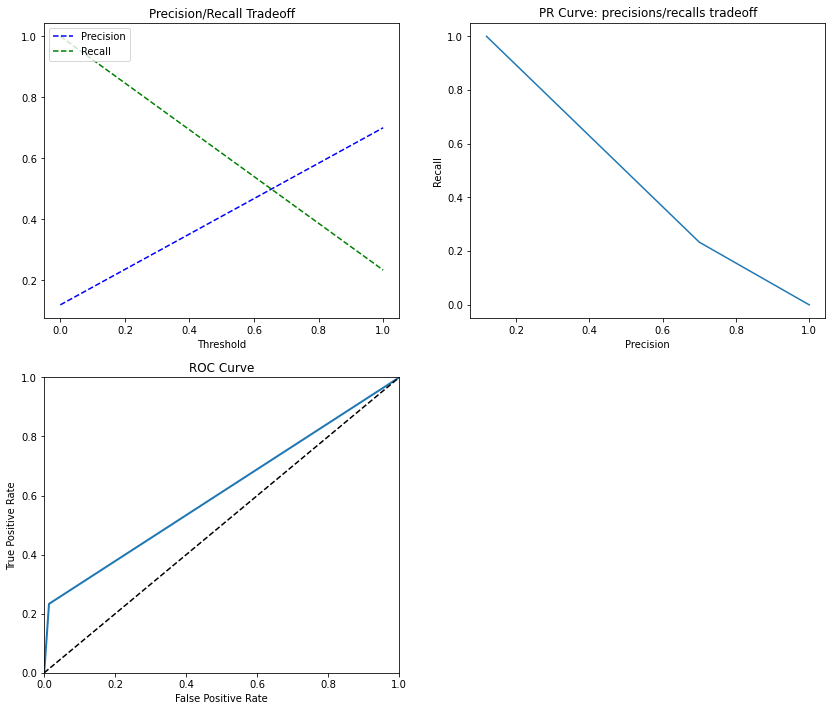

In [180]:
# We take this code for every model from the same previous notebook
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
    
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_model_rands.predict(X_test_xgb))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_model_rands.predict(X_test_xgb))
plot_roc_curve(fpr, tpr)

In [181]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_model_rands.predict(X_train_xgb)),
        'Test': roc_auc_score(y_test, xgb_model_rands.predict(X_test_xgb)),
    }

## Random Forest 

In [182]:
X_train_s_svm = X_train_s.drop([ 'AgeRange', 'MonthlyRange'], axis=1)
X_test_s_svm = X_test_s.drop([ 'AgeRange', 'MonthlyRange'], axis=1)

In [183]:
param_grid = dict(
    n_estimators= [100, 500, 900], 
    max_features= ['auto', 'sqrt'],
    max_depth= [2, 3, 5, 10, 15, None], 
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4], 
    bootstrap= [True, False]
)

rf_clf = RandomForestClassifier(random_state=42)
search = GridSearchCV(rf_clf, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
search.fit(X_train_s_svm, y_train)

for w in [1,5,10]:
    print('---Weight of {} for Attrition class---'.format(w))
    rf_clf = RandomForestClassifier(**search.best_params_, random_state=42, class_weight = {0:1, 1:w})
    rf_clf.fit(X_train_s_svm, y_train)
    evaluate(rf_clf, X_train_s_svm, X_test_s_svm, y_train, y_test)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


KeyboardInterrupt: 

## Results interpretation:

NEED TO BE UPDATED WITH CORRECT NUMB

The process was to make a GridSearchCV of random forests and selecting the one performing the best based on roc_auc.
R
We can observe here that the model performs really well on the training dataset. The accuracy does not make a lot of sense to interpret because of the unbalanced nature of our target variable.

Recall for our positive event (Attrition) of 0.93 is a good score. It means that the model correctly identified 93% of the employees that leave the company on the training dataset. The MCC and Cohen’s Kappa score of 0.96 are also very positive. Those are both metrics that are used to evaluate the performance of classification models. Those rank from -1 to +1 (0 representing random prediction) and can be used even if the classes are of very different sizes.

However, when evaluating the model on the testing data, we see a decrease in performance. The model achieves a MCC of 0.2201, indicating that it is not as effective at generalizing to new data as it is at fitting the training data.

The confusion matrix shows that the model correctly identifies 436 of the negative instances (true negatives) and only 5 of the positive instances (true positives), with 54 false negatives and 2 false positives. This suggests that the model may be overfitting to the training data and not generalizing well to new data.


In [216]:
rf_clf = RandomForestClassifier(**search.best_params_, random_state=42, class_weight = {0:1, 1:10})
rf_clf.fit(X_train_s_svm, y_train)

TypeError: __init__() got an unexpected keyword argument 'C'

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf.predict(X_test_s_svm))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(X_test_s_svm))
plot_roc_curve(fpr, tpr)

In [ ]:
# taken from the same notebook as the evaluate  and feature importance feature 

scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train_s_svm)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test_s_svm)),
    }

In [ ]:
# taken from the same notebook as the evaluate  and feature importance feature 

df = feature_imp(X_train_s_svm, rf_clf)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

# Model comparaison and selection

In [ ]:
scores_df = pd.DataFrame(scores_dict)
scores_df.hvplot.barh()

We decide to select the logistic regression as our final model. Comparing the different ROC_AUC scores of the best of each one of those model family (best hyperparameters...), we observe that the logistic regression is among the highest and is the one with the most consistent score between training and testing. 

Even if the training ROC_AUC score of the Random Forest is higher, we prefer to choose a model that shows little overfitting in the training dataset and that probably generalize better.

## Interpretation of our final model 

### Feature importance

In [ ]:
coefficients = pd.concat([pd.DataFrame(X_train_s_svm.columns), pd.DataFrame(np.transpose(lr_clf.coef_))], axis=1)
coefficients.columns = ['feature', 'coefficient']
coefficients.sort_values(by='coefficient', ascending = False)

### Scores

The accuracy does not make a lot of sense to interpret because of the unbalanced nature of our target variable.

The precision for training set is 37%, meaning that among all the employees that for whome we predicted attrition, 37 actualy left.
The recall is better and is of 69%, meaning that among all the employees that actually leaves, we managed to predict 68%
In our problem, we assume that this is the most important. The worse is to missclassifie an employee that actually leaves and have a FN. We prefer to predict that too much employees will leave where some actually stays,(FP) than missing out on an employee that that leaves.

The MCC and Cohen’s Kappa score of 0.41 and 0,39 are quiet positive. Those are both metrics that are used to evaluate the performance of classification models. Those rank from -1 to +1 (0 representing random prediction) and can be used even if the classes are of very different sizes.

Finally we see that this model tends to not overfit. Indeed the decrease in our ratios is really low from the training to the testing set. We can see .
- precision : 0,373 --> 0,344
- recall . 0,69 --> 0,68
- 


# Lets run the predictions on the test dataset 

In [590]:
data_test=pd.read_csv('ML_group_test.csv')

In [591]:
data_test.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1677,19,Non-Travel,992,Research & Development,1,1,Medical,1,4,...,4,80,0,1,2,2,1,0,0,0
1,1678,45,Travel_Rarely,1136,Sales,4,4,Marketing,1,3,...,3,80,1,7,3,3,2,2,2,2
2,1679,37,Travel_Rarely,155,Research & Development,13,3,Life Sciences,1,4,...,2,80,2,13,2,2,7,7,1,7
3,1680,32,Travel_Rarely,688,Research & Development,1,4,Life Sciences,1,3,...,3,80,0,14,2,2,14,10,11,8
4,1681,29,Travel_Frequently,464,Research & Development,9,1,Life Sciences,1,3,...,1,80,0,1,5,3,1,0,0,0


In [592]:
data.shape

(1675, 38)

In [593]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1119.0,2236.000000,323.171781,1677.0,1956.5,2236.0,2515.5,2795.0
Age,1119.0,36.147453,8.786102,18.0,30.0,35.0,41.0,59.0
DailyRate,1119.0,883.550492,366.427230,6.0,589.0,889.0,1206.0,1499.0
DistanceFromHome,1119.0,8.667560,7.772384,1.0,2.0,7.0,12.0,29.0
Education,1119.0,2.941912,1.012986,1.0,2.0,3.0,4.0,5.0
EmployeeCount,1119.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EnvironmentSatisfaction,1119.0,2.736372,1.106668,0.0,2.0,3.0,4.0,4.0
HourlyRate,1119.0,68.226095,19.495282,30.0,52.0,71.0,85.0,100.0
JobInvolvement,1119.0,2.741734,0.652751,0.0,2.0,3.0,3.0,4.0
JobLevel,1119.0,1.999106,1.091109,1.0,1.0,2.0,2.0,5.0


### Skewness transformation:

In [594]:
list_skew = ["DistanceFromHome", "MonthlyIncome", "NumCompaniesWorked", "TotalWorkingYears", "YearsAtCompany", "YearsSinceLastPromotion"]

In [595]:
for column in (list_skew):
    if data_test[column].skew() > 0.1:
        data_test[column] = data_test[column].transform(lambda x:np.log1p(x))

### We start by one-hot-encoding the categorical features:

In [596]:
#Lets drop some columns first:

In [597]:
data_test=data_test.drop(['Over18'],axis=1)

In [598]:
df=data_test['id']

In [599]:
data_test=data_test.drop(['id'],axis=1)

In [600]:
data_test.drop(columns = ["EmployeeCount", "StandardHours"], inplace = True)

In [601]:
data_test = data_test.drop(index = (data_test.loc[data_test["DailyRate"] == 3921]).index)

In [602]:
to_remove = data_test.loc[(data_test["Age"] - data_test["TotalWorkingYears"]) < 16]
data_test.drop(index = to_remove.index, inplace=True)

In [603]:
#Lets also add some features:

In [604]:
data_test["years_per_company"] = data_test["TotalWorkingYears"] / (np.where(data_test["NumCompaniesWorked"]== 0,1,data_test["NumCompaniesWorked"]))
data_test.replace([np.inf, -np.inf], 0, inplace=True)

In [605]:
data_test["current_role_duration_by_total_length"] = data_test["YearsInCurrentRole"] / data_test["YearsAtCompany"] 
data_test.replace([np.inf, -np.inf], 0, inplace=True)

In [606]:
data_test["current_role_duration_by_total_length"].fillna(0, inplace=True)

In [607]:
data_test['YearsAtCompany_by_TotalWorkingYears'] = data_test["YearsAtCompany"] / (np.where(data_test['TotalWorkingYears']== 0,1,data_test['TotalWorkingYears']))
data_test.replace([np.inf, -np.inf], 0, inplace=True)

In [608]:
data_test['YearsSinceLastPromotion_by_YearsWithCurrManager'] = data_test['YearsSinceLastPromotion'] / (np.where(data_test["YearsWithCurrManager"]== 0,1, data_test["YearsWithCurrManager"])) 
data_test.replace([np.inf, -np.inf], 0, inplace=True)

In [609]:
X_test_cat = data_test.select_dtypes("object")
X_test_cat.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [610]:
X_test_ohe = ohe.transform(X_test_cat)

In [611]:
X_test_ohe = pd.DataFrame(X_test_ohe)
X_test_ohe.columns = ohe.get_feature_names_out()
X_test_ohe.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [612]:
print(f"data_test size: {data_test.shape}")
print(f"X_test_ohe size: {X_test_ohe.shape}")

data_test size: (1119, 34)
X_test_ohe size: (1119, 28)


In [613]:
# Concatenating X_test_ohe encoded with Original X_test
data_test.reset_index(drop=True, inplace=True)
X_test_ohe.reset_index(drop=True, inplace=True)

In [614]:
X_test_ohe.shape

(1119, 28)

In [615]:
X_test_full_ohe = pd.concat([data_test, X_test_ohe], axis=1)
X_test_full_ohe.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,19,Non-Travel,992,Research & Development,0.693147,1,Medical,4,Male,43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,45,Travel_Rarely,1136,Sales,1.609438,4,Marketing,3,Male,67,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,37,Travel_Rarely,155,Research & Development,2.639057,3,Life Sciences,4,Male,41,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,32,Travel_Rarely,688,Research & Development,0.693147,4,Life Sciences,3,Male,89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,29,Travel_Frequently,464,Research & Development,2.302585,1,Life Sciences,3,Male,79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [616]:
X_test_full_ohe.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'years_per_company',
       'current_role_duration_by_total_length',
       'YearsAtCompany_by_TotalWorkingYears',
       'YearsSinceLastPromotion_by_YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'Educatio

### Then we scale the numerical features (not including the numerical features that are categorical but were originally encoded):

In [617]:
encoded_col_names= ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole','MaritalStatus', 'OverTime','Education','EnvironmentSatisfaction','StockOptionLevel','TrainingTimesLastYear','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance','BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently','BusinessTravel_Travel_Rarely', 'Department_Human Resources','Department_Research & Development', 'Department_Sales','EducationField_Human Resources', 'EducationField_Life Sciences','EducationField_Marketing', 'EducationField_Medical','EducationField_Other', 'EducationField_Technical Degree','Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative','JobRole_Human Resources', 'JobRole_Laboratory Technician','JobRole_Manager', 'JobRole_Manufacturing Director','JobRole_Research Director', 'JobRole_Research Scientist','JobRole_Sales Executive', 'JobRole_Sales Representative','MaritalStatus_Divorced', 'MaritalStatus_Married','MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes']
encoded_col_names

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Education',
 'EnvironmentSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'JobInvolvement',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'Marita

In [618]:
X_test_s=X_test_full_ohe

In [619]:
to_scale_test=X_test_s.drop(columns=encoded_col_names)

In [620]:
to_scale_test.head().T

,0,1,2,3,4
Age,19.000000,45.000000,37.000000,32.000000,29.000000
DailyRate,992.000000,1136.000000,155.000000,688.000000,464.000000
DistanceFromHome,0.693147,1.609438,2.639057,0.693147,2.302585
HourlyRate,43.000000,67.000000,41.000000,89.000000,79.000000
JobLevel,1.000000,2.000000,1.000000,2.000000,1.000000
MonthlyIncome,7.748891,8.610137,7.916443,8.561975,7.109879
MonthlyRate,17778.000000,12421.000000,23577.000000,20364.000000,15178.000000
NumCompaniesWorked,0.693147,1.945910,1.609438,0.693147,0.693147
PercentSalaryHike,12.000000,12.000000,13.000000,13.000000,14.000000
TotalWorkingYears,0.693147,2.079442,2.639057,2.708050,0.693147


In [621]:
scaled_X_test = scale_model.transform(to_scale_test)
scaled_X_test_df=pd.DataFrame(scaled_X_test,columns=to_scale_test.columns)
scaled_X_test_df.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,years_per_company,current_role_duration_by_total_length,YearsAtCompany_by_TotalWorkingYears,YearsSinceLastPromotion_by_YearsWithCurrManager
0,-2.015017,0.282128,-1.483673,-1.230397,-0.917359,-1.173759,0.418254,-0.510993,-0.838765,-2.275150,-1.471412,-1.751627,-0.923698,-1.169507,-1.201639,-2.101991,0.765227,-0.691704
1,1.059367,0.671830,-0.392511,-0.011269,0.018363,0.171992,-0.337878,1.336696,-0.838765,-0.241594,-0.929753,0.388696,0.475196,-0.610167,-1.128520,2.617668,-1.113471,1.200338
2,0.113403,-1.983016,0.833608,-1.331991,-0.917359,-0.911949,1.236773,0.840436,-0.546109,0.579307,0.380534,5.739501,-0.041094,0.788182,-0.519971,6.625239,-0.079374,-0.350634
3,-0.477825,-0.540577,-1.483673,1.106265,0.018363,0.096736,0.783264,-0.510993,-0.546109,0.680512,1.220291,8.949984,2.240403,1.067852,1.895773,7.471457,0.765227,0.378179
4,-0.832561,-1.146780,0.432921,0.598295,-0.917359,-2.172255,0.051268,-0.510993,-0.253452,-2.275150,-1.471412,-1.751627,-0.923698,-1.169507,-1.201639,-2.101991,0.765227,-0.691704


In [622]:
X_test_s.drop(columns = to_scale_test.columns, inplace = True)

In [623]:
X_test_s.reset_index(drop=True, inplace=True)
scaled_X_test_df.reset_index(drop=True, inplace=True)
X_test_s = pd.concat([X_test_s, scaled_X_test_df], axis = 1)

In [624]:
X_test_s.shape

(1119, 62)

In [625]:
X_test_s = X_test_s.drop(['Department', 'EducationField','PerformanceRating','JobLevel','YearsInCurrentRole','YearsWithCurrManager', 'BusinessTravel',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender', 
       'JobRole', 'MaritalStatus', 'OverTime'], axis=1)

In [626]:
X_test_s.shape

(1119, 42)

### Lets now run a Logistic Regression model (with a weight of 5 for the minority class):

In [627]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1', class_weight = {0:1, 1:5})
lr_clf.fit(X_train_s_svm, y_train)

LogisticRegression(class_weight={0: 1, 1: 5}, penalty='l1', solver='liblinear')

In [628]:
predictions=lr_clf.predict(X_test_s)

In [629]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [630]:
X_test_s['Attrition']=predictions

In [631]:
X_test_s['Attrition'].value_counts()

0    932
1    187
Name: Attrition, dtype: int64

In [632]:
X_test_s.head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,...,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,years_per_company,current_role_duration_by_total_length,YearsAtCompany_by_TotalWorkingYears,YearsSinceLastPromotion_by_YearsWithCurrManager,Attrition
0,1,4,3,3,4,0,2,2,1.0,0.0,...,-0.510993,-0.838765,-2.275150,-1.471412,-0.923698,-1.201639,-2.101991,0.765227,-0.691704,0
1,4,3,3,1,3,1,3,3,0.0,0.0,...,1.336696,-0.838765,-0.241594,-0.929753,0.475196,-1.128520,2.617668,-1.113471,1.200338,0
2,3,4,3,4,2,2,2,2,0.0,0.0,...,0.840436,-0.546109,0.579307,0.380534,-0.041094,-0.519971,6.625239,-0.079374,-0.350634,0
3,4,3,2,3,3,0,2,2,0.0,0.0,...,-0.510993,-0.546109,0.680512,1.220291,2.240403,1.895773,7.471457,0.765227,0.378179,0
4,1,3,3,4,1,0,5,3,0.0,1.0,...,-0.510993,-0.253452,-2.275150,-1.471412,-0.923698,-1.201639,-2.101991,0.765227,-0.691704,1


In [633]:
df = pd.concat([df, X_test_s], axis=1)
df.head()

,id,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,BusinessTravel_Non-Travel,...,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,years_per_company,current_role_duration_by_total_length,YearsAtCompany_by_TotalWorkingYears,YearsSinceLastPromotion_by_YearsWithCurrManager,Attrition
0,1677,1,4,3,3,4,0,2,2,1.0,...,-0.510993,-0.838765,-2.275150,-1.471412,-0.923698,-1.201639,-2.101991,0.765227,-0.691704,0
1,1678,4,3,3,1,3,1,3,3,0.0,...,1.336696,-0.838765,-0.241594,-0.929753,0.475196,-1.128520,2.617668,-1.113471,1.200338,0
2,1679,3,4,3,4,2,2,2,2,0.0,...,0.840436,-0.546109,0.579307,0.380534,-0.041094,-0.519971,6.625239,-0.079374,-0.350634,0
3,1680,4,3,2,3,3,0,2,2,0.0,...,-0.510993,-0.546109,0.680512,1.220291,2.240403,1.895773,7.471457,0.765227,0.378179,0
4,1681,1,3,3,4,1,0,5,3,0.0,...,-0.510993,-0.253452,-2.275150,-1.471412,-0.923698,-1.201639,-2.101991,0.765227,-0.691704,1


In [634]:
df.columns

Index(['id', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobSatisfaction', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes', 'Age',
       'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'years_per_company', '

In [635]:
df=df.drop(['Education', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobSatisfaction', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes', 'Age',
       'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'years_per_company', 'current_role_duration_by_total_length',
       'YearsAtCompany_by_TotalWorkingYears',
       'YearsSinceLastPromotion_by_YearsWithCurrManager'],axis=1)

In [638]:
df

,id,Attrition
0,1677,0
1,1678,0
2,1679,0
3,1680,0
4,1681,1
...,...,...
1114,2791,0
1115,2792,0
1116,2793,0
1117,2794,0


In [640]:
#df.to_csv("submission_ML_7.csv")